<a href="https://colab.research.google.com/github/MrBlisteringBarnacles/INSE-6220/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
df = pd.read_csv('/content/Updated Menu 2.csv')
df.head(n=25)

Calories  Calories from Fat  Total Fat  Total Fat (% Daily Value)  \
0        300                120       13.0                         20   
1        250                 70        8.0                         12   
2        370                200       23.0                         35   
3        450                250       28.0                         43   
4        400                210       23.0                         35   
5        430                210       23.0                         36   
6        460                230       26.0                         40   
7        520                270       30.0                         47   
8        410                180       20.0                         32   
9        470                220       25.0                         38   
10       430                240       27.0                         42   
11       480                280       31.0                         48   
12       510                290       33.0                         50   
13       570                330       37.0                         57   
14       460                250       27.0                         42   
15       520                280       32.0                         49   
16       410                180       20.0                         31   
17       470                220       24.0                         37   
18       540                290       32.0                         49   
19       460                190       21.0                         32   
20       400                140       15.0                         24   
21       420                200       22.0                         34   
22       550                280       31.0                         48   
23       500                230       26.0                         40   
24       620                280       31.0                         48   

    Saturated Fat  Saturated Fat (% Daily Value)  Cholesterol  \
0             5.0                             25          260   
1             3.0                             15           25   
2             8.0                             42           45   
3            10.0                             52          285   
4             8.0                             42           50   
5             9.0                             46          300   
6            13.0                             65          250   
7            14.0                             68          250   
8            11.0                             56           35   
9            12.0                             59           35   
10           12.0                             62           30   
11           13.0                             65           30   
12           14.0                             71          250   
13           15.0                             74          250   
14           12.0                             62           35   
15           13.0                             65           35   
16            8.0                             41           30   
17            9.0                             45           30   
18           16.0                             78          280   
19            9.0                             44          250   
20            7.0                             34           35   
21            8.0                             40           35   
22           12.0                             61          265   
23           10.0                             52           50   
24           11.0                             56          275   

    Cholesterol (% Daily Value)  Sodium  Sodium (% Daily Value)  ...  \
0                            87     750                      31  ...   
1                             8     770                      32  ...   
2                            15     780                      33  ...   
3                            95     860                      36  ...   
4                            16     880               

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Calories                       260 non-null    int64  
 1   Calories from Fat              260 non-null    int64  
 2   Total Fat                      260 non-null    float64
 3   Total Fat (% Daily Value)      260 non-null    int64  
 4   Saturated Fat                  260 non-null    float64
 5   Saturated Fat (% Daily Value)  260 non-null    int64  
 6   Cholesterol                    260 non-null    int64  
 7   Cholesterol (% Daily Value)    260 non-null    int64  
 8   Sodium                         260 non-null    int64  
 9   Sodium (% Daily Value)         260 non-null    int64  
 10  Carbohydrates                  260 non-null    int64  
 11  Carbohydrates (% Daily Value)  260 non-null    int64  
 12  Dietary Fiber                  260 non-null    int

In [39]:
y = df['Updated Trans Fat']
target = df['Updated Trans Fat'].to_numpy()

In [40]:
X = df.iloc[:,0:8]
X.head(10)

Calories  Calories from Fat  Total Fat  Total Fat (% Daily Value)  \
0       300                120       13.0                         20   
1       250                 70        8.0                         12   
2       370                200       23.0                         35   
3       450                250       28.0                         43   
4       400                210       23.0                         35   
5       430                210       23.0                         36   
6       460                230       26.0                         40   
7       520                270       30.0                         47   
8       410                180       20.0                         32   
9       470                220       25.0                         38   

   Saturated Fat  Saturated Fat (% Daily Value)  Cholesterol  \
0            5.0                             25          260   
1            3.0                             15           25   
2            8.0                             42           45   
3           10.0                             52          285   
4            8.0                             42           50   
5            9.0                             46          300   
6           13.0                             65          250   
7           14.0                             68          250   
8           11.0                             56           35   
9           12.0                             59           35   

   Cholesterol (% Daily Value)  
0                           87  
1                            8  
2                           15  
3                           95  
4                           16  
5                          100  
6                           83  
7                           83  
8                           11  
9                           11

In [6]:
X.describe().transpose()

count        mean         std  min      25%  \
Calories                       260.0  368.269231  240.269886  0.0  210.000   
Calories from Fat              260.0  127.096154  127.875914  0.0   20.000   
Total Fat                      260.0   14.165385   14.205998  0.0    2.375   
Total Fat (% Daily Value)      260.0   21.815385   21.885199  0.0    3.750   
Saturated Fat                  260.0    6.007692    5.321873  0.0    1.000   
Saturated Fat (% Daily Value)  260.0   29.965385   26.639209  0.0    4.750   
Cholesterol                    260.0   54.942308   87.269257  0.0    5.000   
Cholesterol (% Daily Value)    260.0   18.392308   29.091653  0.0    2.000   

                                 50%     75%     max  
Calories                       340.0  500.00  1880.0  
Calories from Fat              100.0  200.00  1060.0  
Total Fat                       11.0   22.25   118.0  
Total Fat (% Daily Value)       17.0   35.00   182.0  
Saturated Fat                    5.0   10.00    20.0  
Saturated Fat (% Daily Value)   24.0   48.00   102.0  
Cholesterol                     35.0   65.00   575.0  
Cholesterol (% Daily Value)     11.0   21.25   192.0

In [7]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [8]:
df.describe().transpose()

count          mean       std       min  \
Calories                       260.0  0.000000e+00  1.001929 -1.535688   
Calories from Fat              260.0  2.732857e-17  1.001929 -0.995819   
Total Fat                      260.0 -2.732857e-17  1.001929 -0.999064   
Total Fat (% Daily Value)      260.0 -2.732857e-17  1.001929 -0.998732   
Saturated Fat                  260.0  1.366428e-17  1.001929 -1.131045   
Saturated Fat (% Daily Value)  260.0  6.832142e-17  1.001929 -1.127030   
Cholesterol                    260.0 -2.732857e-17  1.001929 -0.630787   
Cholesterol (% Daily Value)    260.0  0.000000e+00  1.001929 -0.633439   

                                    25%       50%       75%       max  
Calories                      -0.659985 -0.117883  0.549319  6.303938  
Calories from Fat             -0.839116 -0.212303  0.571214  7.309454  
Total Fat                     -0.831559 -0.223250  0.570196  7.323306  
Total Fat (% Daily Value)     -0.827053 -0.220454  0.603606  7.333429  
Saturated Fat                 -0.942779 -0.189714  0.751616  2.634278  
Saturated Fat (% Daily Value) -0.948377 -0.224364  0.678301  2.709298  
Cholesterol                   -0.573382 -0.228955  0.115471  5.970725  
Cholesterol (% Daily Value)   -0.564558 -0.254594  0.098420  5.979121

In [9]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

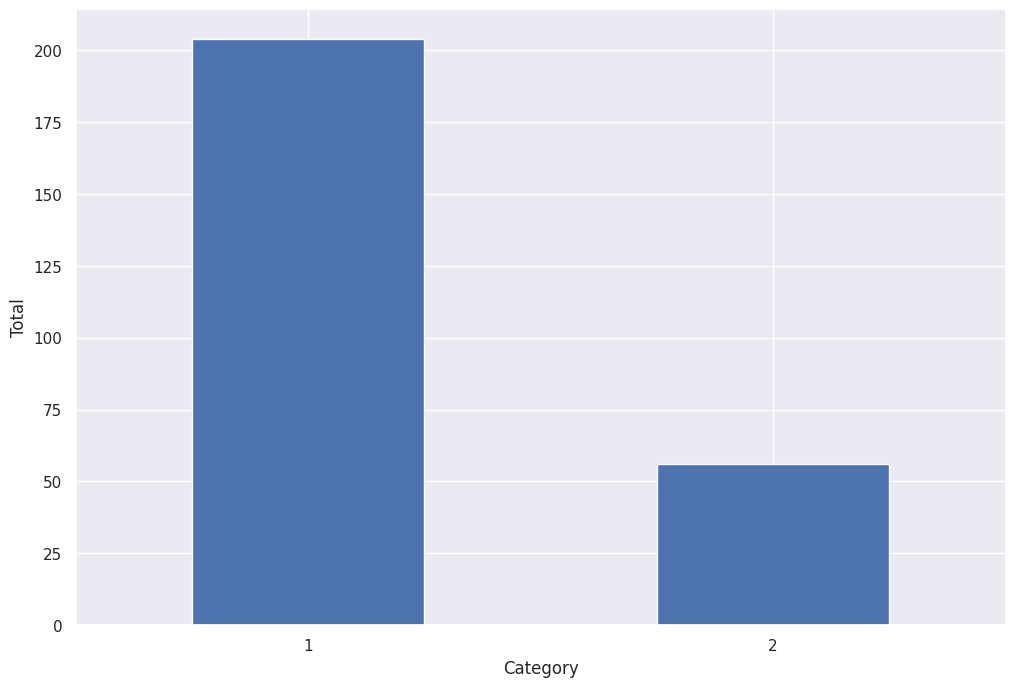

In [10]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Category')
plt.ylabel('Total')
plt.show()

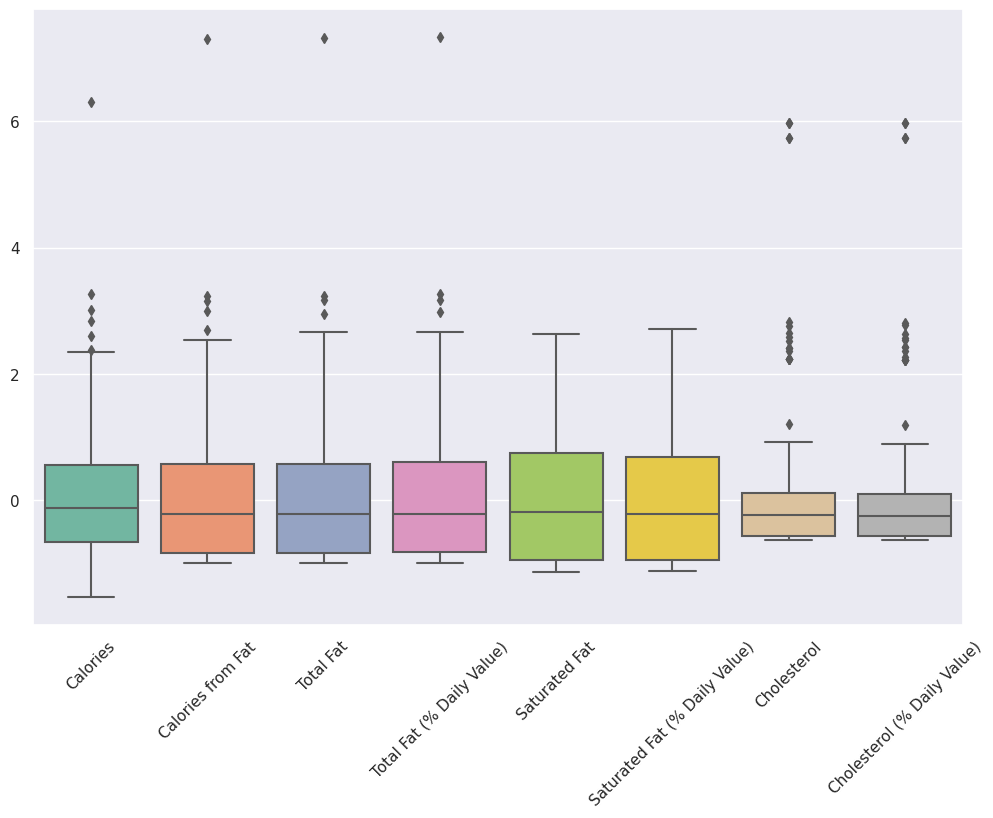

In [11]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


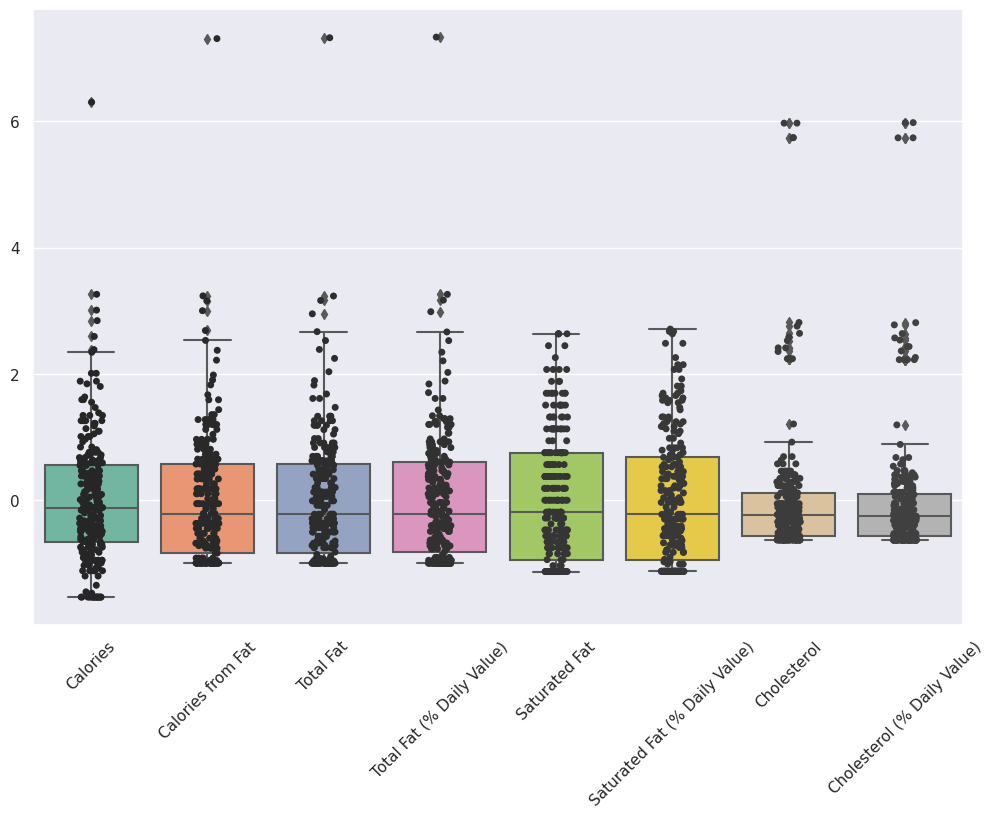

In [12]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [13]:
df.describe()

Calories  Calories from Fat     Total Fat  Total Fat (% Daily Value)  \
count  260.000000       2.600000e+02  2.600000e+02               2.600000e+02   
mean     0.000000       2.732857e-17 -2.732857e-17              -2.732857e-17   
std      1.001929       1.001929e+00  1.001929e+00               1.001929e+00   
min     -1.535688      -9.958191e-01 -9.990642e-01              -9.987325e-01   
25%     -0.659985      -8.391158e-01 -8.315589e-01              -8.270533e-01   
50%     -0.117883      -2.123028e-01 -2.232500e-01              -2.204536e-01   
75%      0.549319       5.712135e-01  5.701963e-01               6.036063e-01   
max      6.303938       7.309454e+00  7.323306e+00               7.333429e+00   

       Saturated Fat  Saturated Fat (% Daily Value)   Cholesterol  \
count   2.600000e+02                   2.600000e+02  2.600000e+02   
mean    1.366428e-17                   6.832142e-17 -2.732857e-17   
std     1.001929e+00                   1.001929e+00  1.001929e+00   
min    -1.131045e+00                  -1.127030e+00 -6.307865e-01   
25%    -9.427790e-01                  -9.483771e-01 -5.733821e-01   
50%    -1.897144e-01                  -2.243644e-01 -2.289554e-01   
75%     7.516164e-01                   6.783008e-01  1.154712e-01   
max     2.634278e+00                   2.709298e+00  5.970725e+00   

       Cholesterol (% Daily Value)  
count                   260.000000  
mean                      0.000000  
std                       1.001929  
min                      -0.633439  
25%                      -0.564558  
50%                      -0.254594  
75%                       0.098420  
max                       5.979121

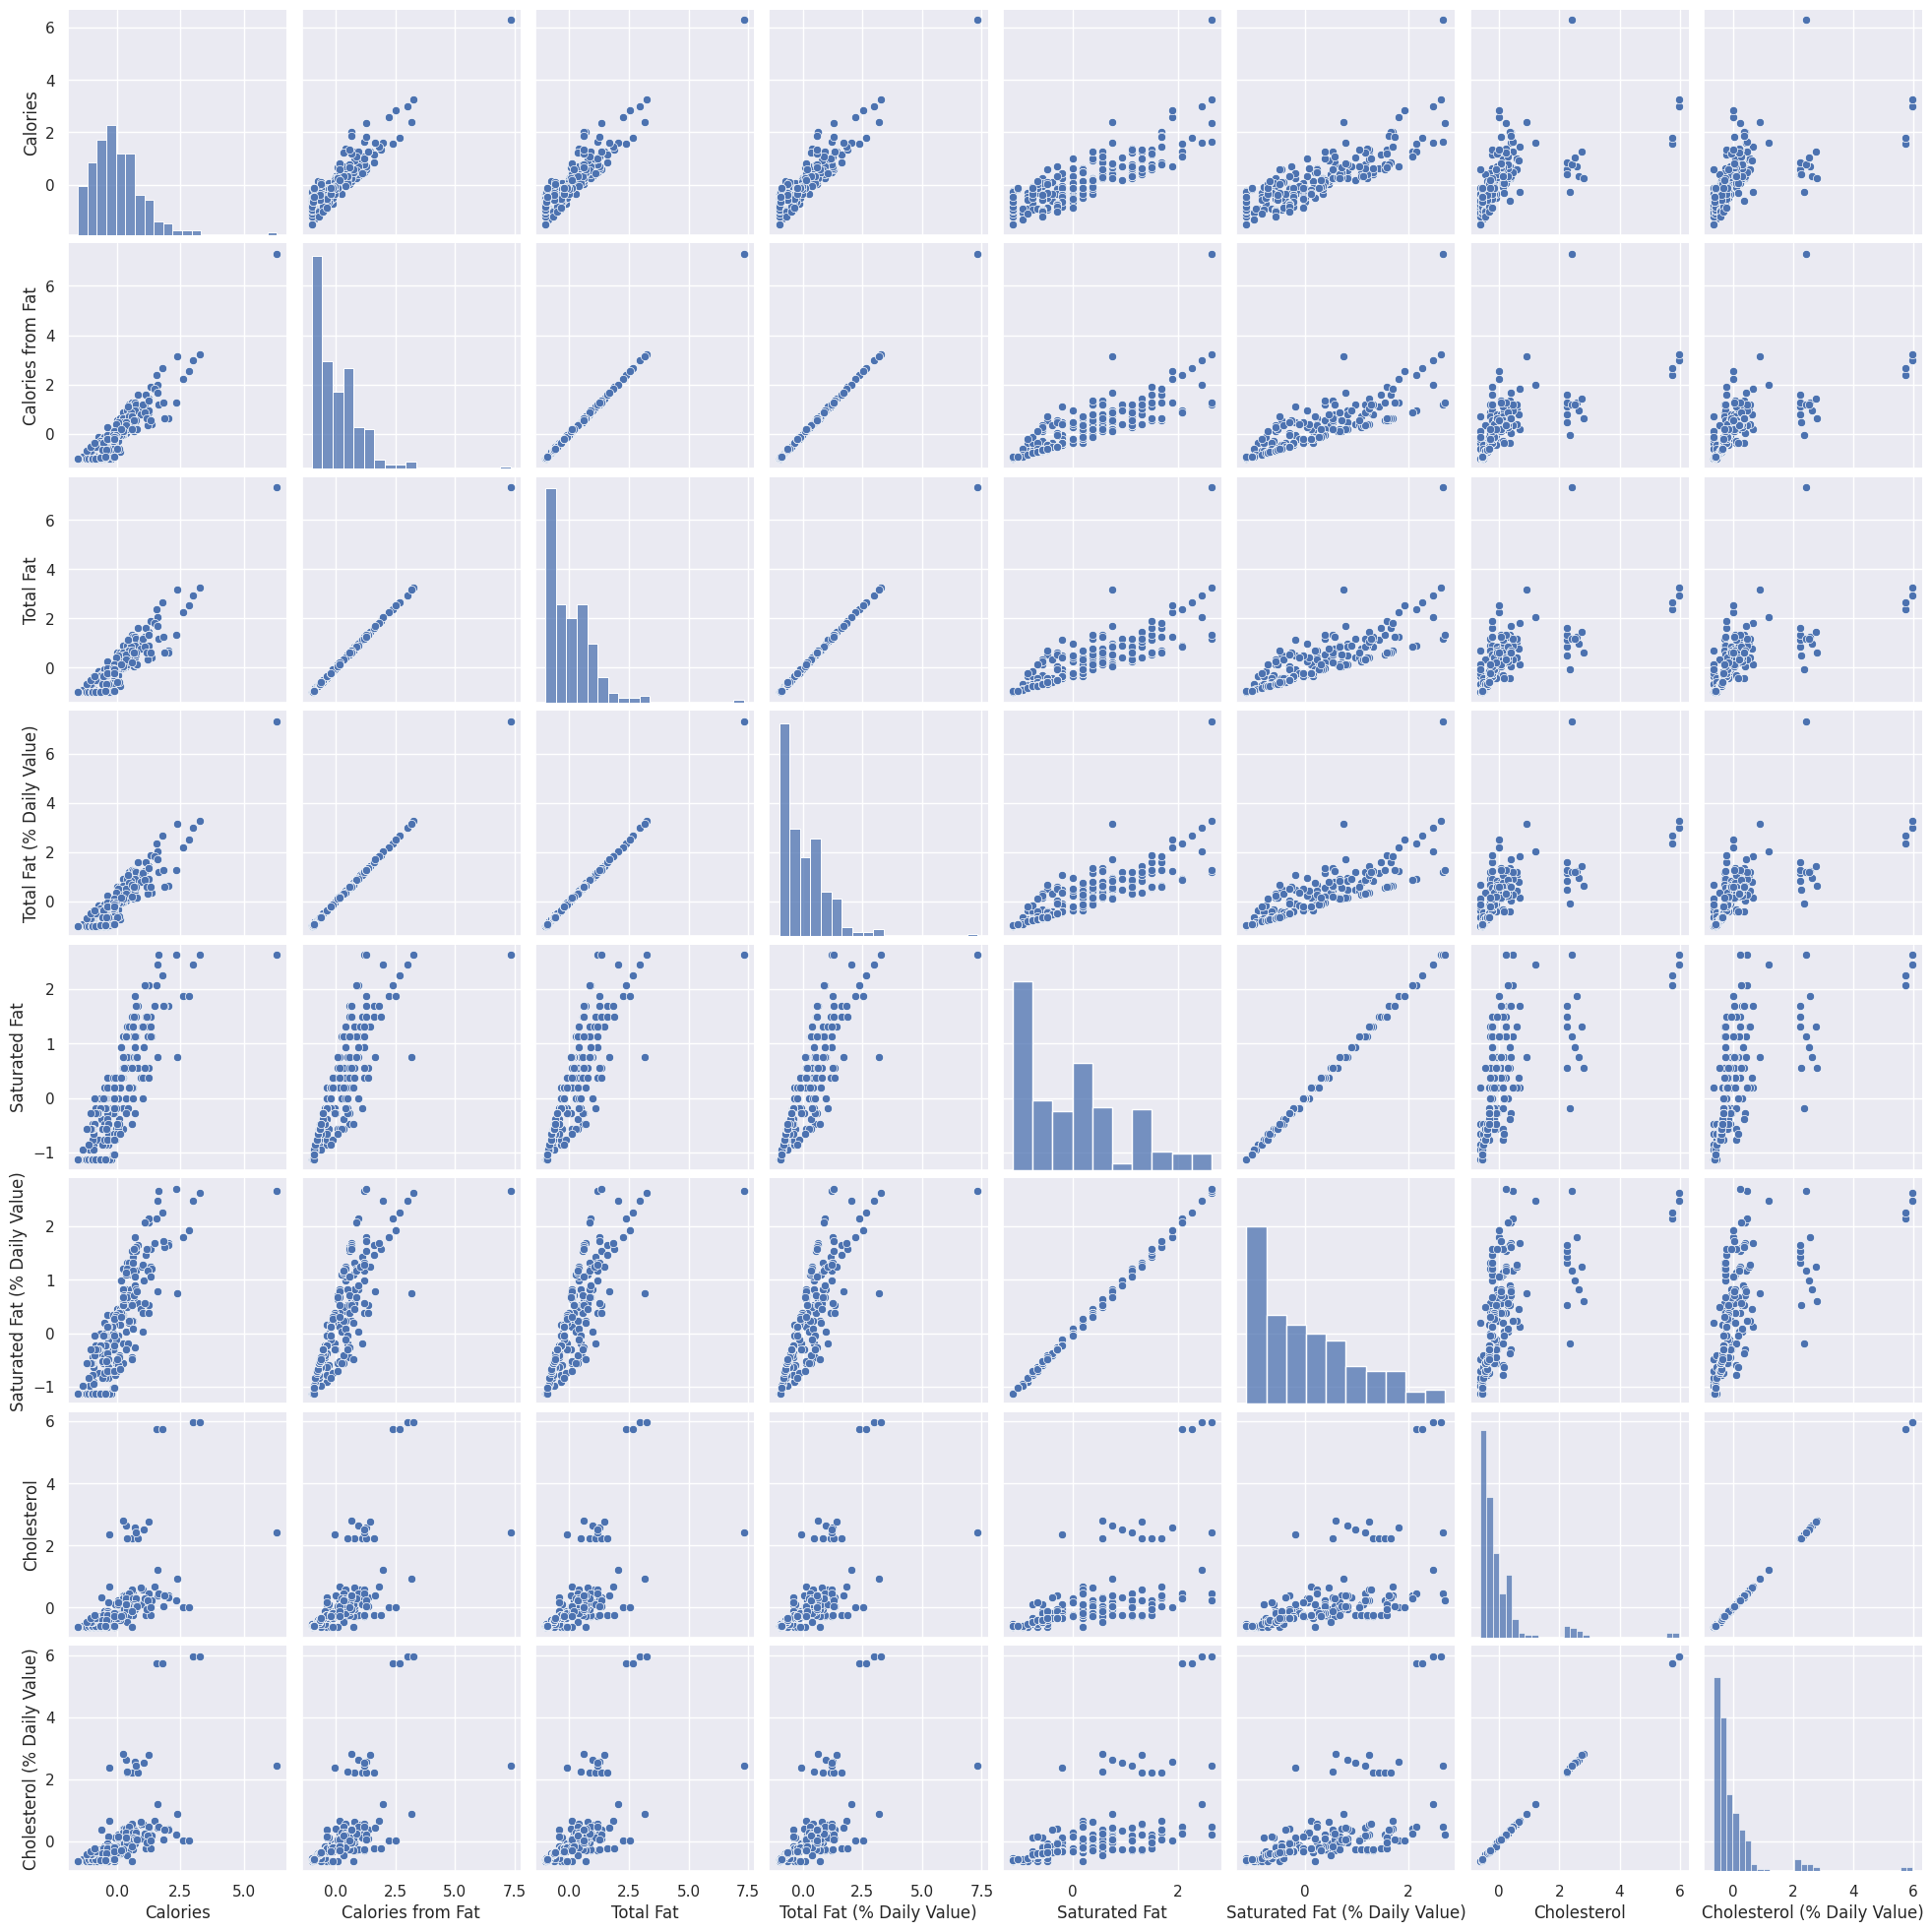

In [14]:
sns.pairplot(df)

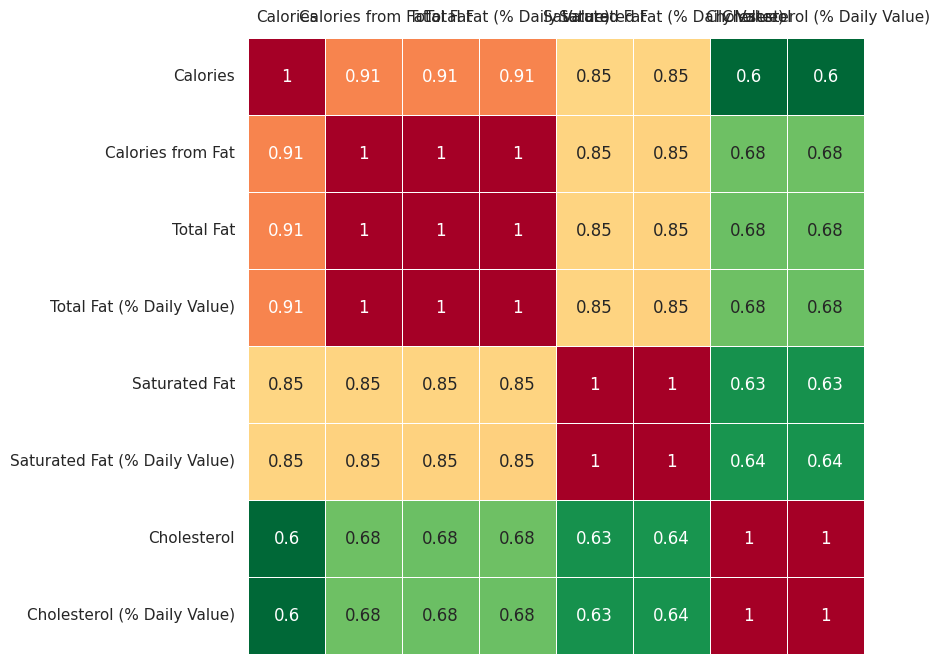

In [15]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

Text(0, 0.5, 'A2')

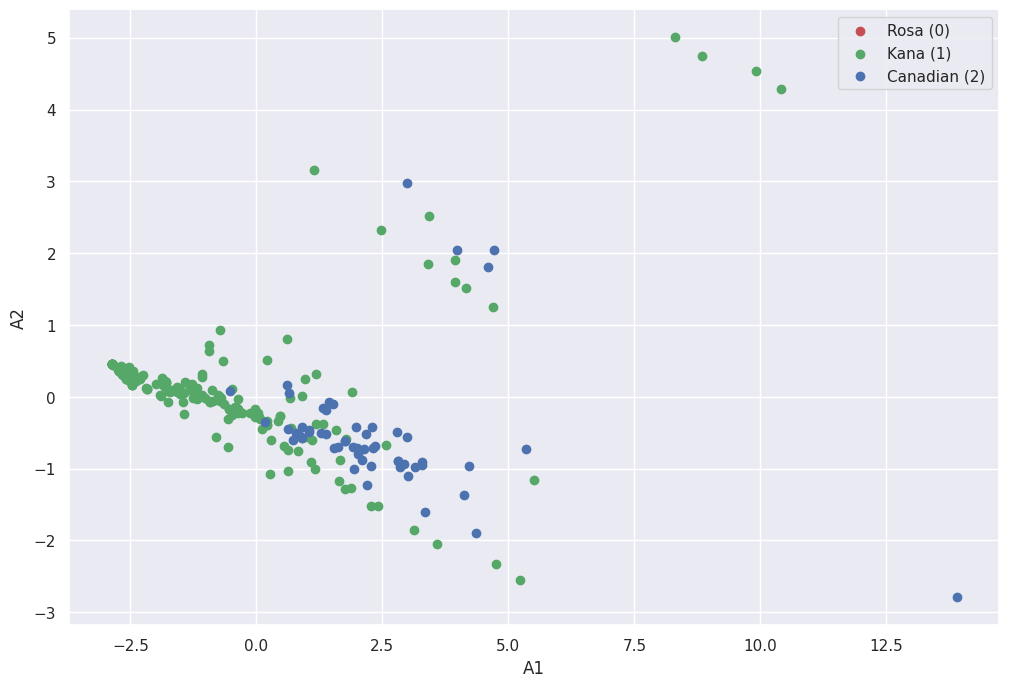

In [16]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend()
plt.xlabel('A1')
plt.ylabel('A2')

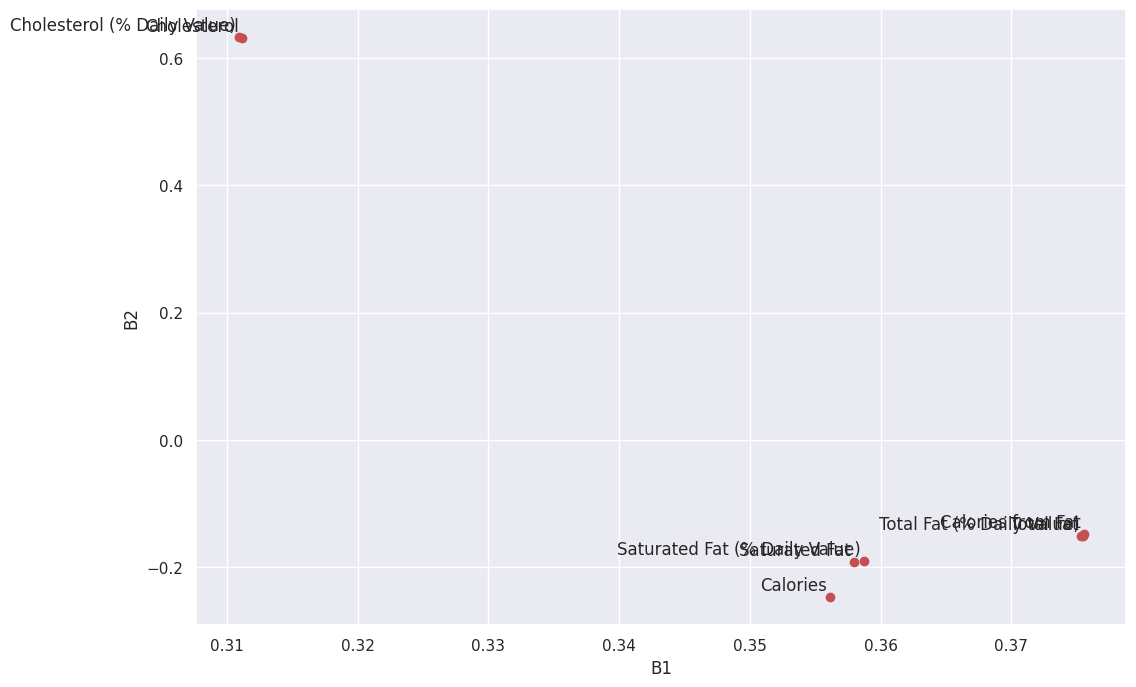

In [17]:
A = pca.components_.T
plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('B1')
plt.ylabel('B2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


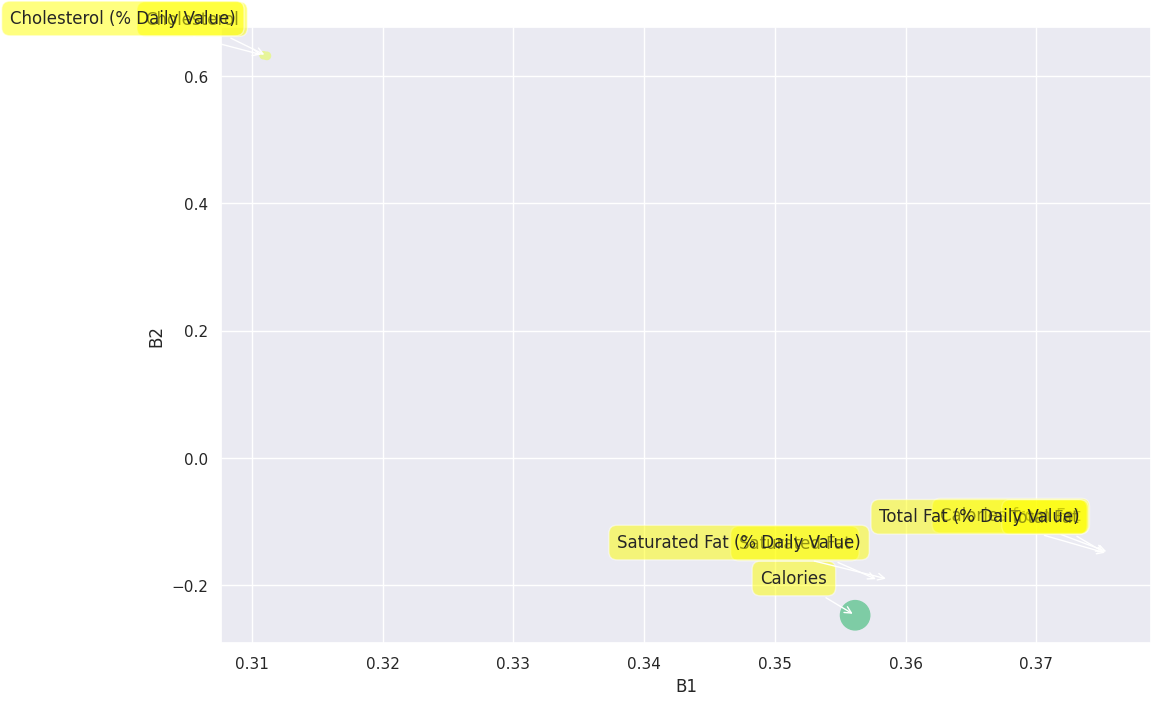

In [18]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('B1')
plt.ylabel('B2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

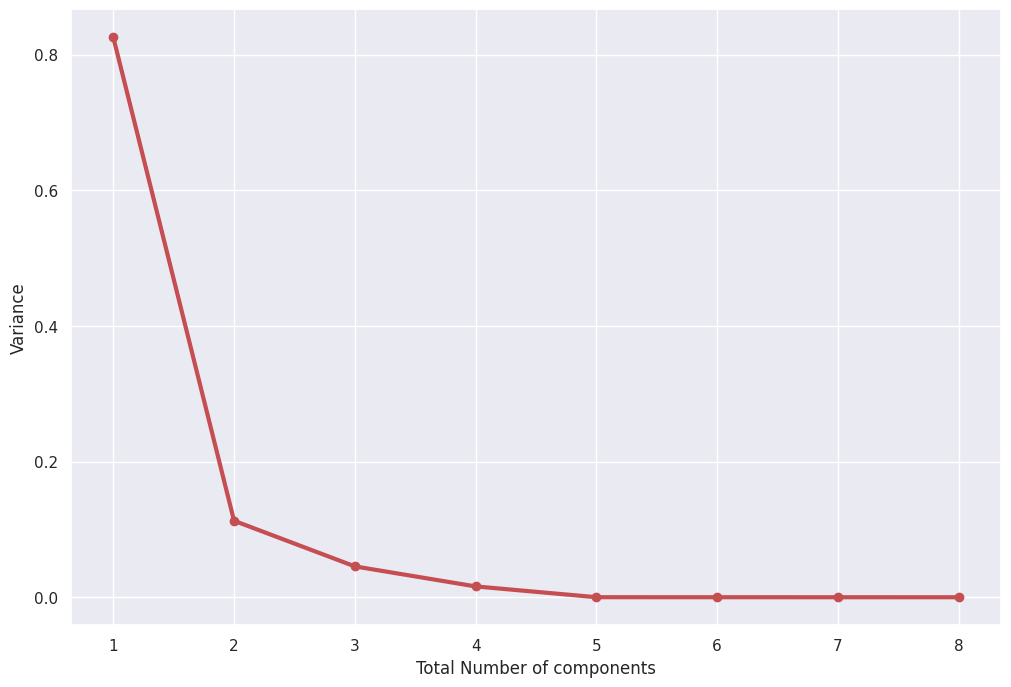

[6.63001724e+00 9.05624392e-01 3.65502780e-01 1.28328014e-01
 7.10816454e-04 3.39387298e-04 2.22551462e-04 1.42854277e-04]


In [19]:
#Eigenvalues
Lambda = pca.explained_variance_
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Total Number of components')
plt.ylabel('Variance')
plt.show()
print(Lambda)

Text(0, 0.5, 'Cumulative Variance')

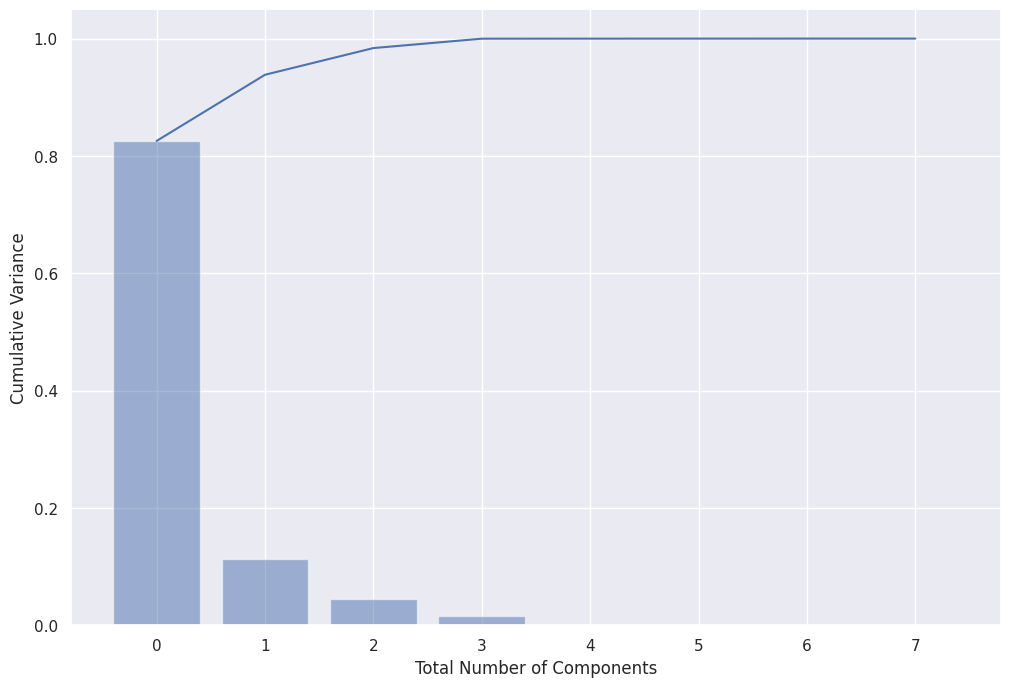

In [20]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Total Number of Components')
plt.ylabel('Cumulative Variance')

In [21]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance


{'0': 'PC 1 (82.6%)',
 '1': 'PC 2 (11.3%)',
 '2': 'PC 3 (4.6%)',
 '3': 'PC 4 (1.6%)',
 '4': 'PC 5 (0.0%)',
 '5': 'PC 6 (0.0%)',
 '6': 'PC 7 (0.0%)',
 '7': 'PC 8 (0.0%)'}

[[ 0.35613976 -0.24674505  0.1226196   0.89287528 -0.00186819 -0.00153027
  -0.00259668 -0.00263514]
 [ 0.37556104 -0.14816951  0.33712324 -0.23492047 -0.01203652  0.77217792
   0.26739809  0.01595726]
 [ 0.37536944 -0.15025781  0.33827995 -0.23706702 -0.00622339 -0.61656994
   0.53177041  0.05393789]
 [ 0.37546715 -0.14993603  0.33607559 -0.24010662  0.01375832 -0.15299929
  -0.79858324 -0.0679143 ]
 [ 0.35793184 -0.1918437  -0.57049298 -0.11892588 -0.70372112 -0.00502501
  -0.01196069  0.00913603]
 [ 0.35870938 -0.19035187 -0.56295723 -0.11686019  0.71005944  0.00544307
   0.01460684 -0.00944466]
 [ 0.31113614  0.63159826 -0.02823346  0.05624617  0.00960875  0.00638963
  -0.0620639   0.70450841]
 [ 0.31088142  0.6325743  -0.02742292  0.05263885 -0.0111115  -0.00871441
   0.06138582 -0.70406818]]


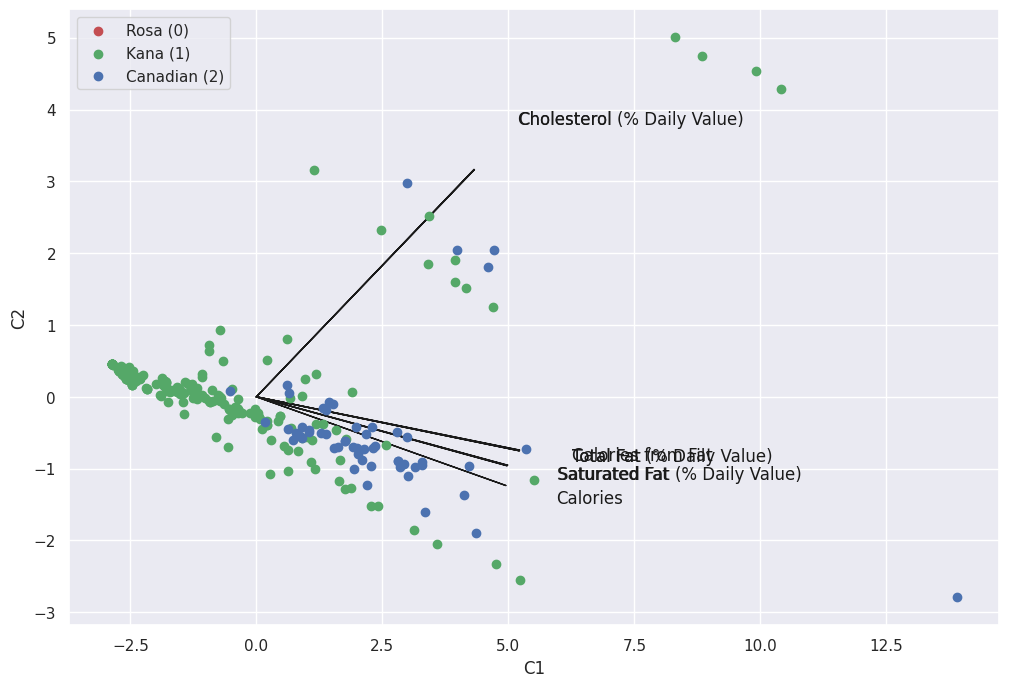

In [22]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('C1')
plt.ylabel('C2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')
print(A)

In [23]:
!pip install pca

In [24]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [25]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC                        feature   loading  type
0  PC1              Calories from Fat  0.375561  best
1  PC2    Cholesterol (% Daily Value)  0.632574  best
2  PC3                  Saturated Fat -0.570493  best
3  PC1                       Calories  0.356140  weak
4  PC1                      Total Fat  0.375369  weak
5  PC1      Total Fat (% Daily Value)  0.375467  weak
6  PC3  Saturated Fat (% Daily Value) -0.562957  weak
7  PC2                    Cholesterol  0.631598  weak


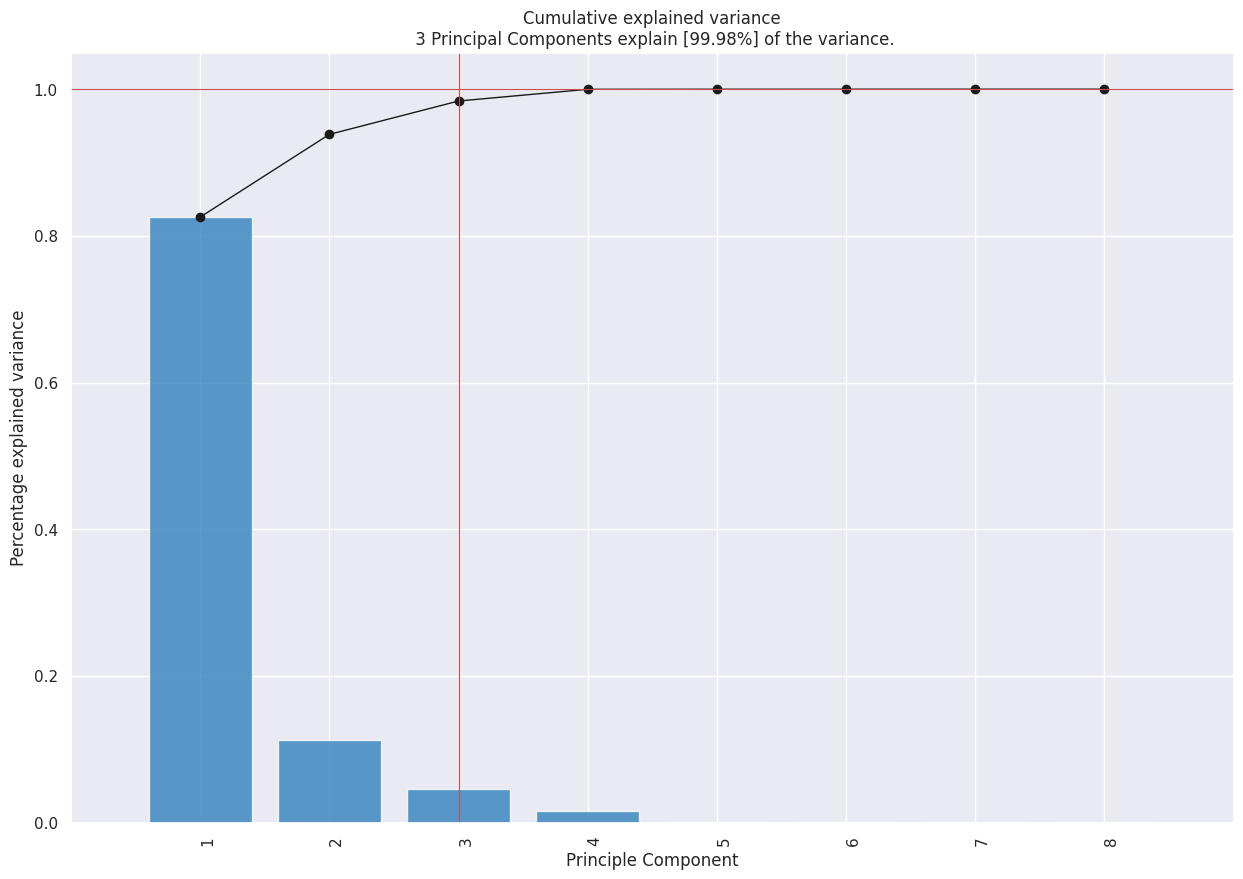

In [26]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


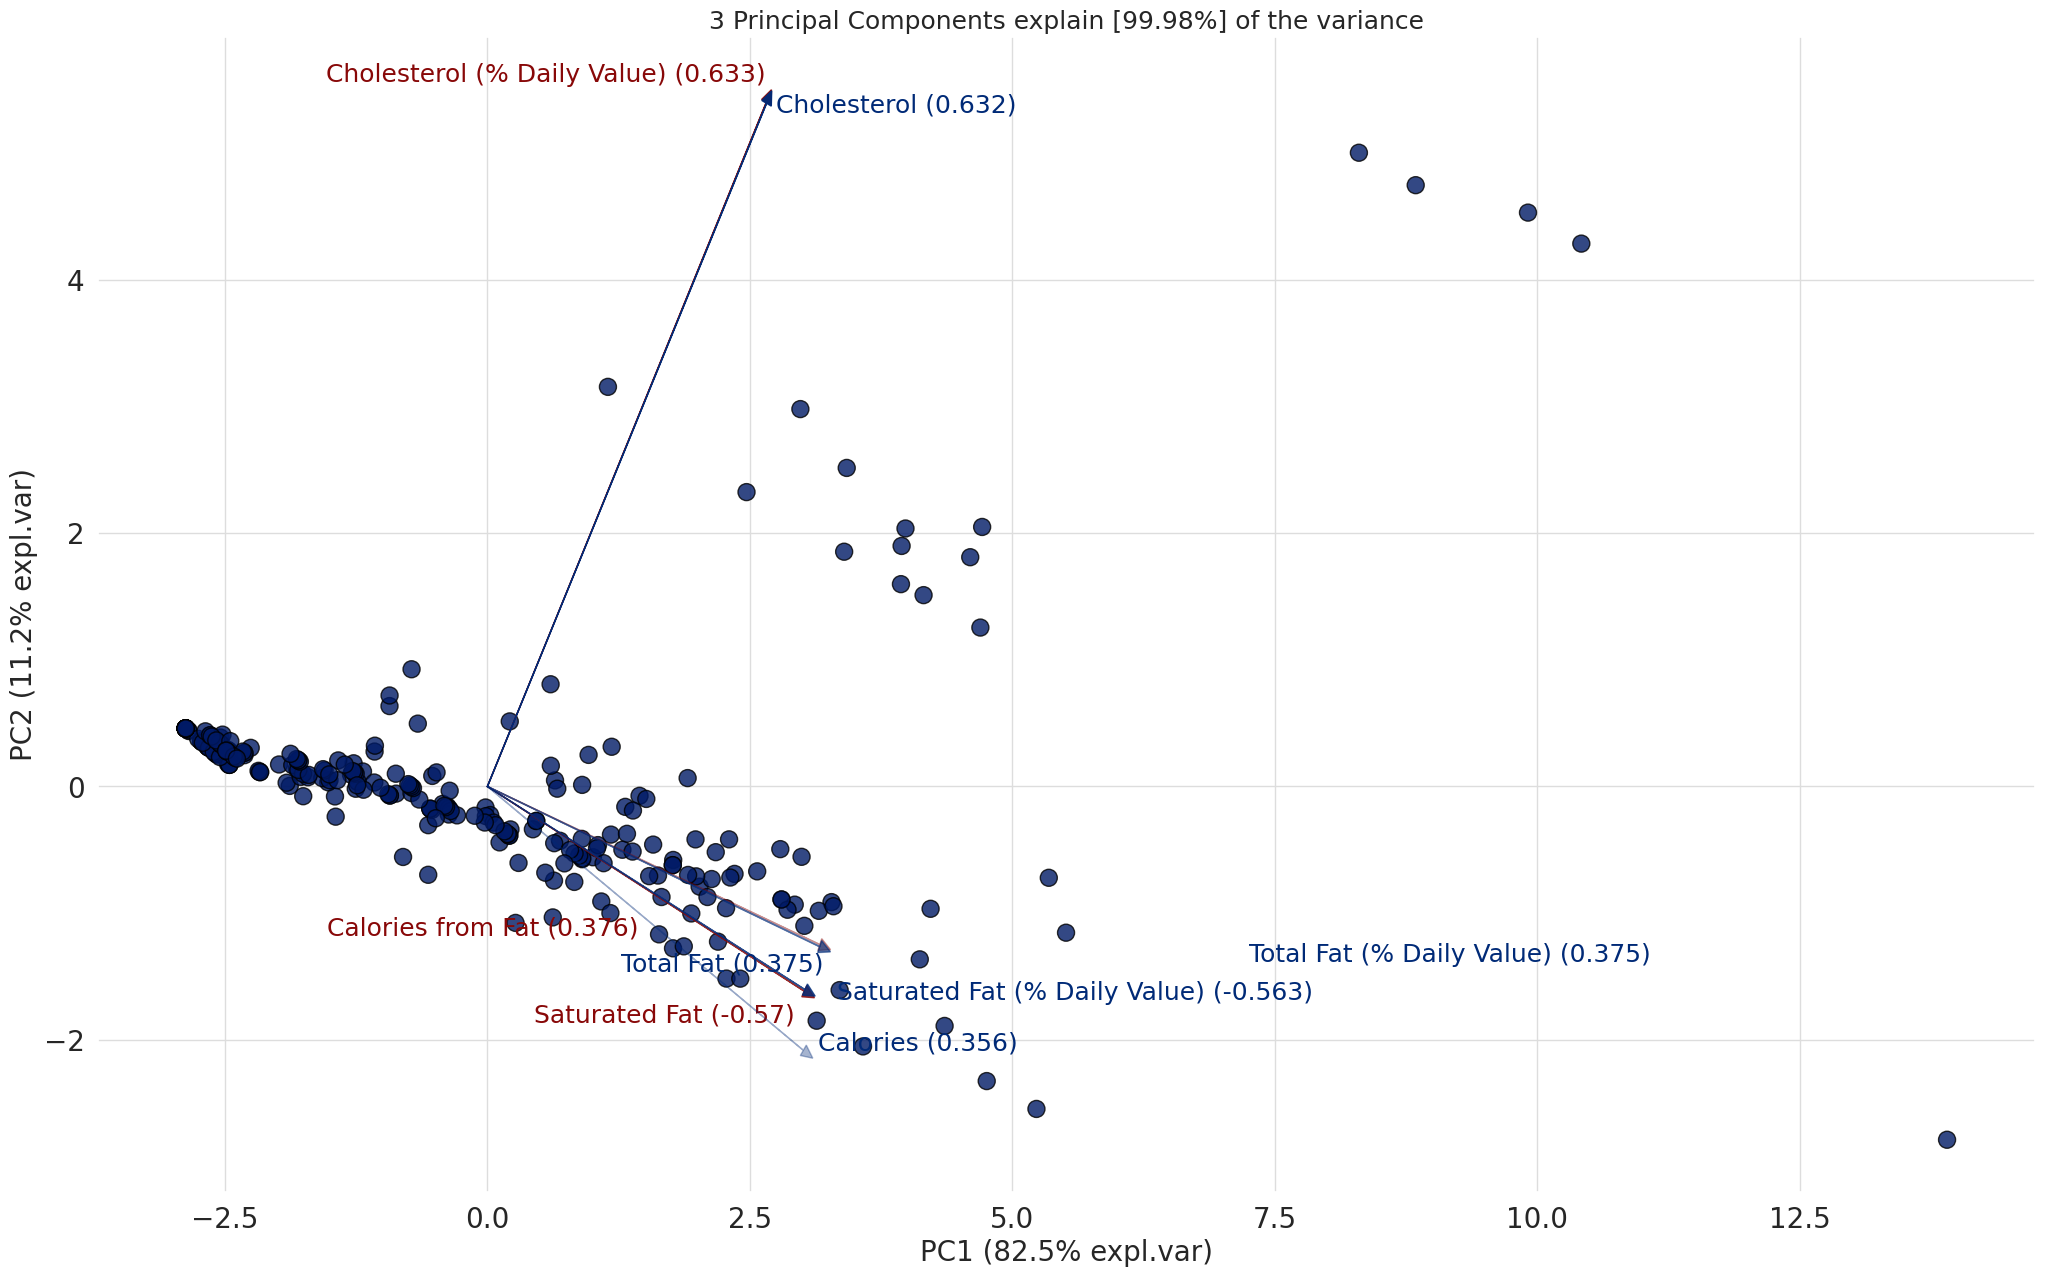

In [27]:
ax = model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '3 Principal Components explain [99.98%] of the variance'}, xlabel='PC1 (82.5% expl.var)', ylabel='PC2 (11.2% expl.var)'>)

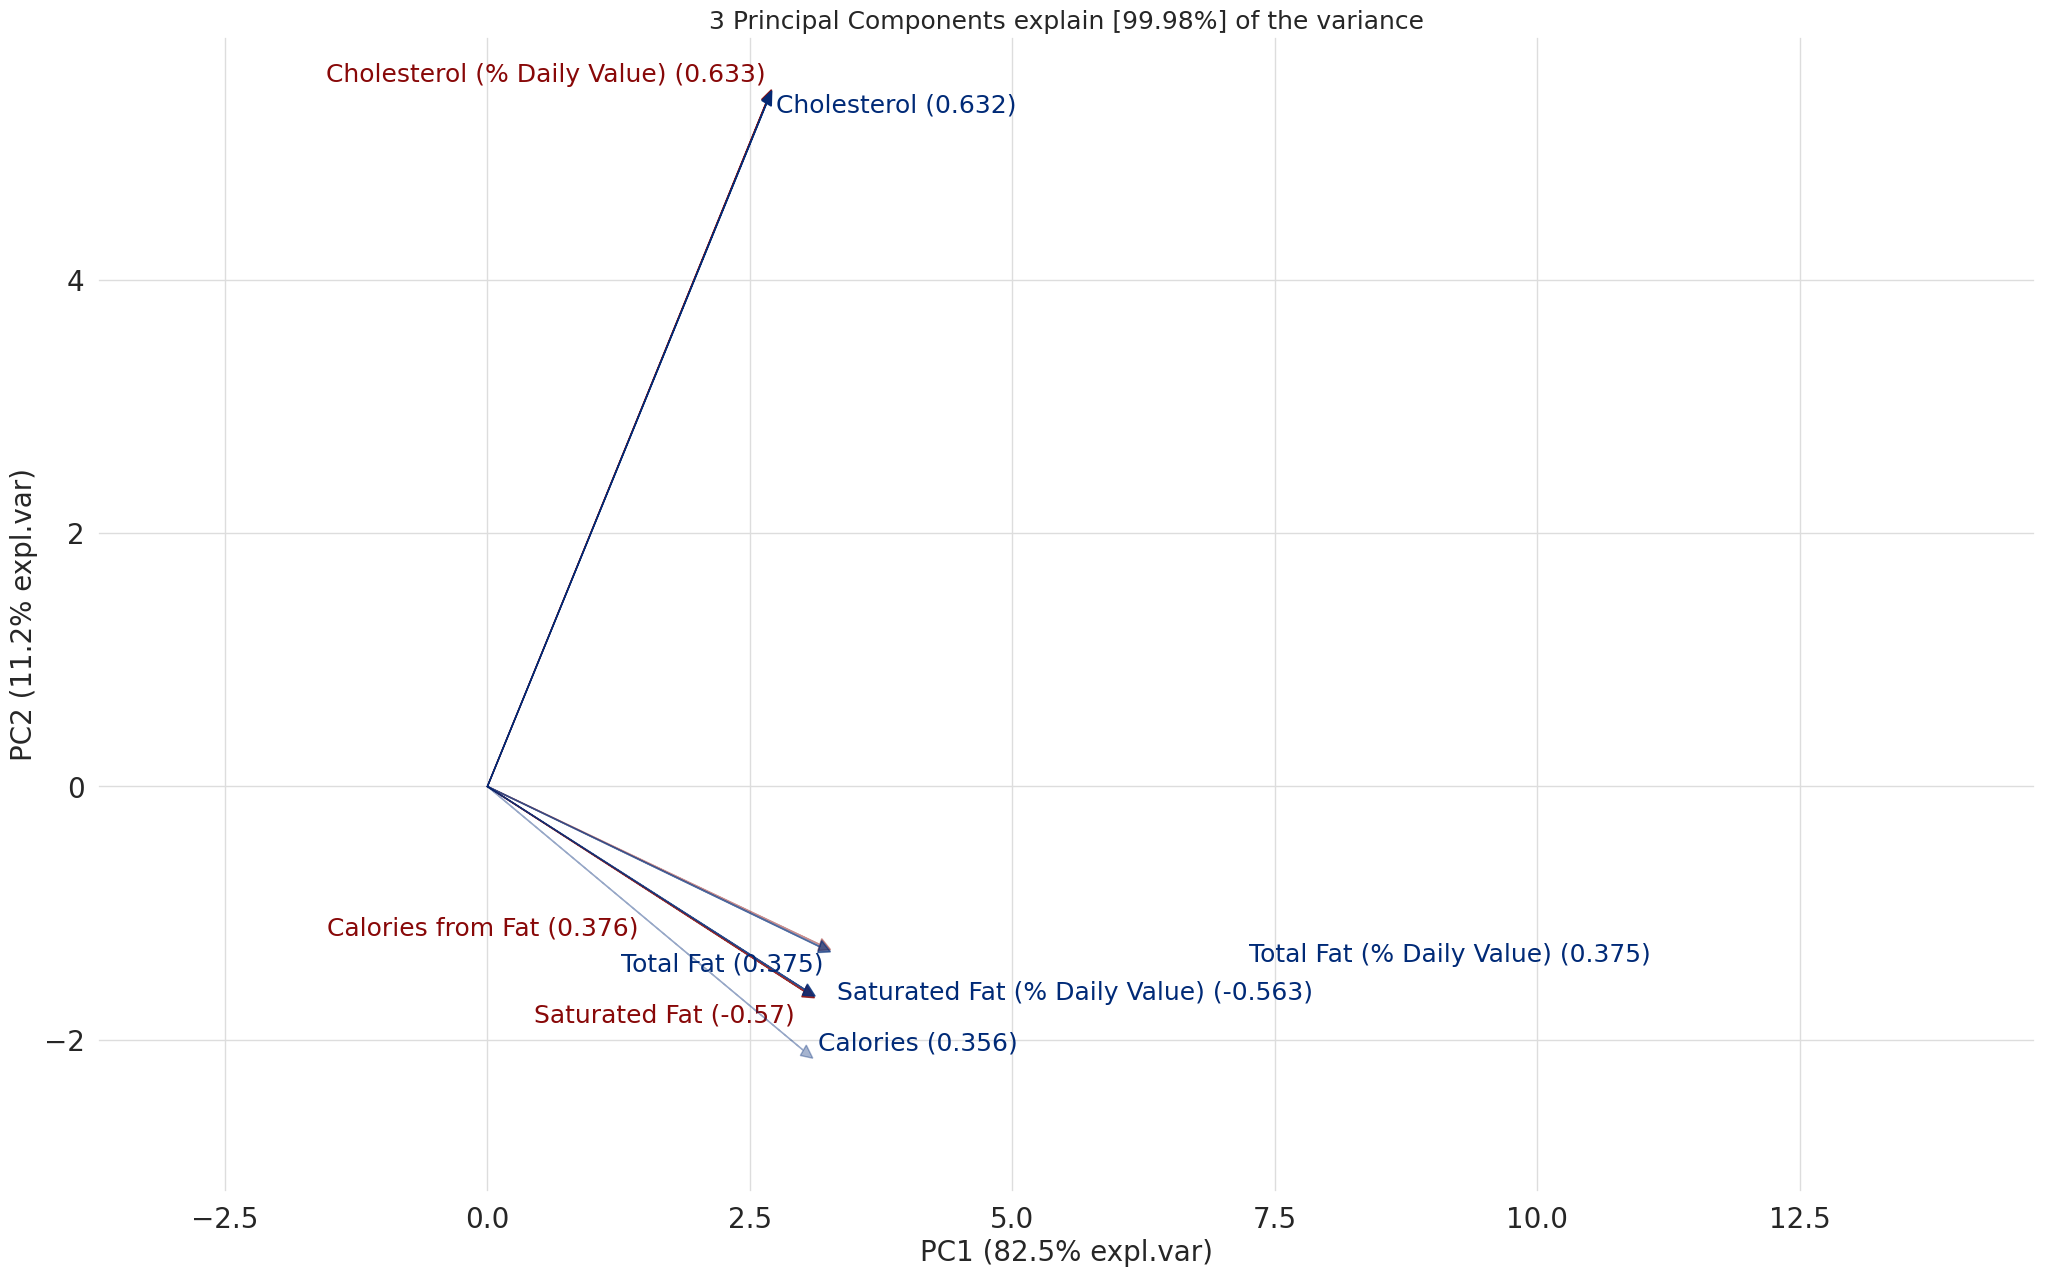

In [28]:
model.biplot(cmap=None, label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


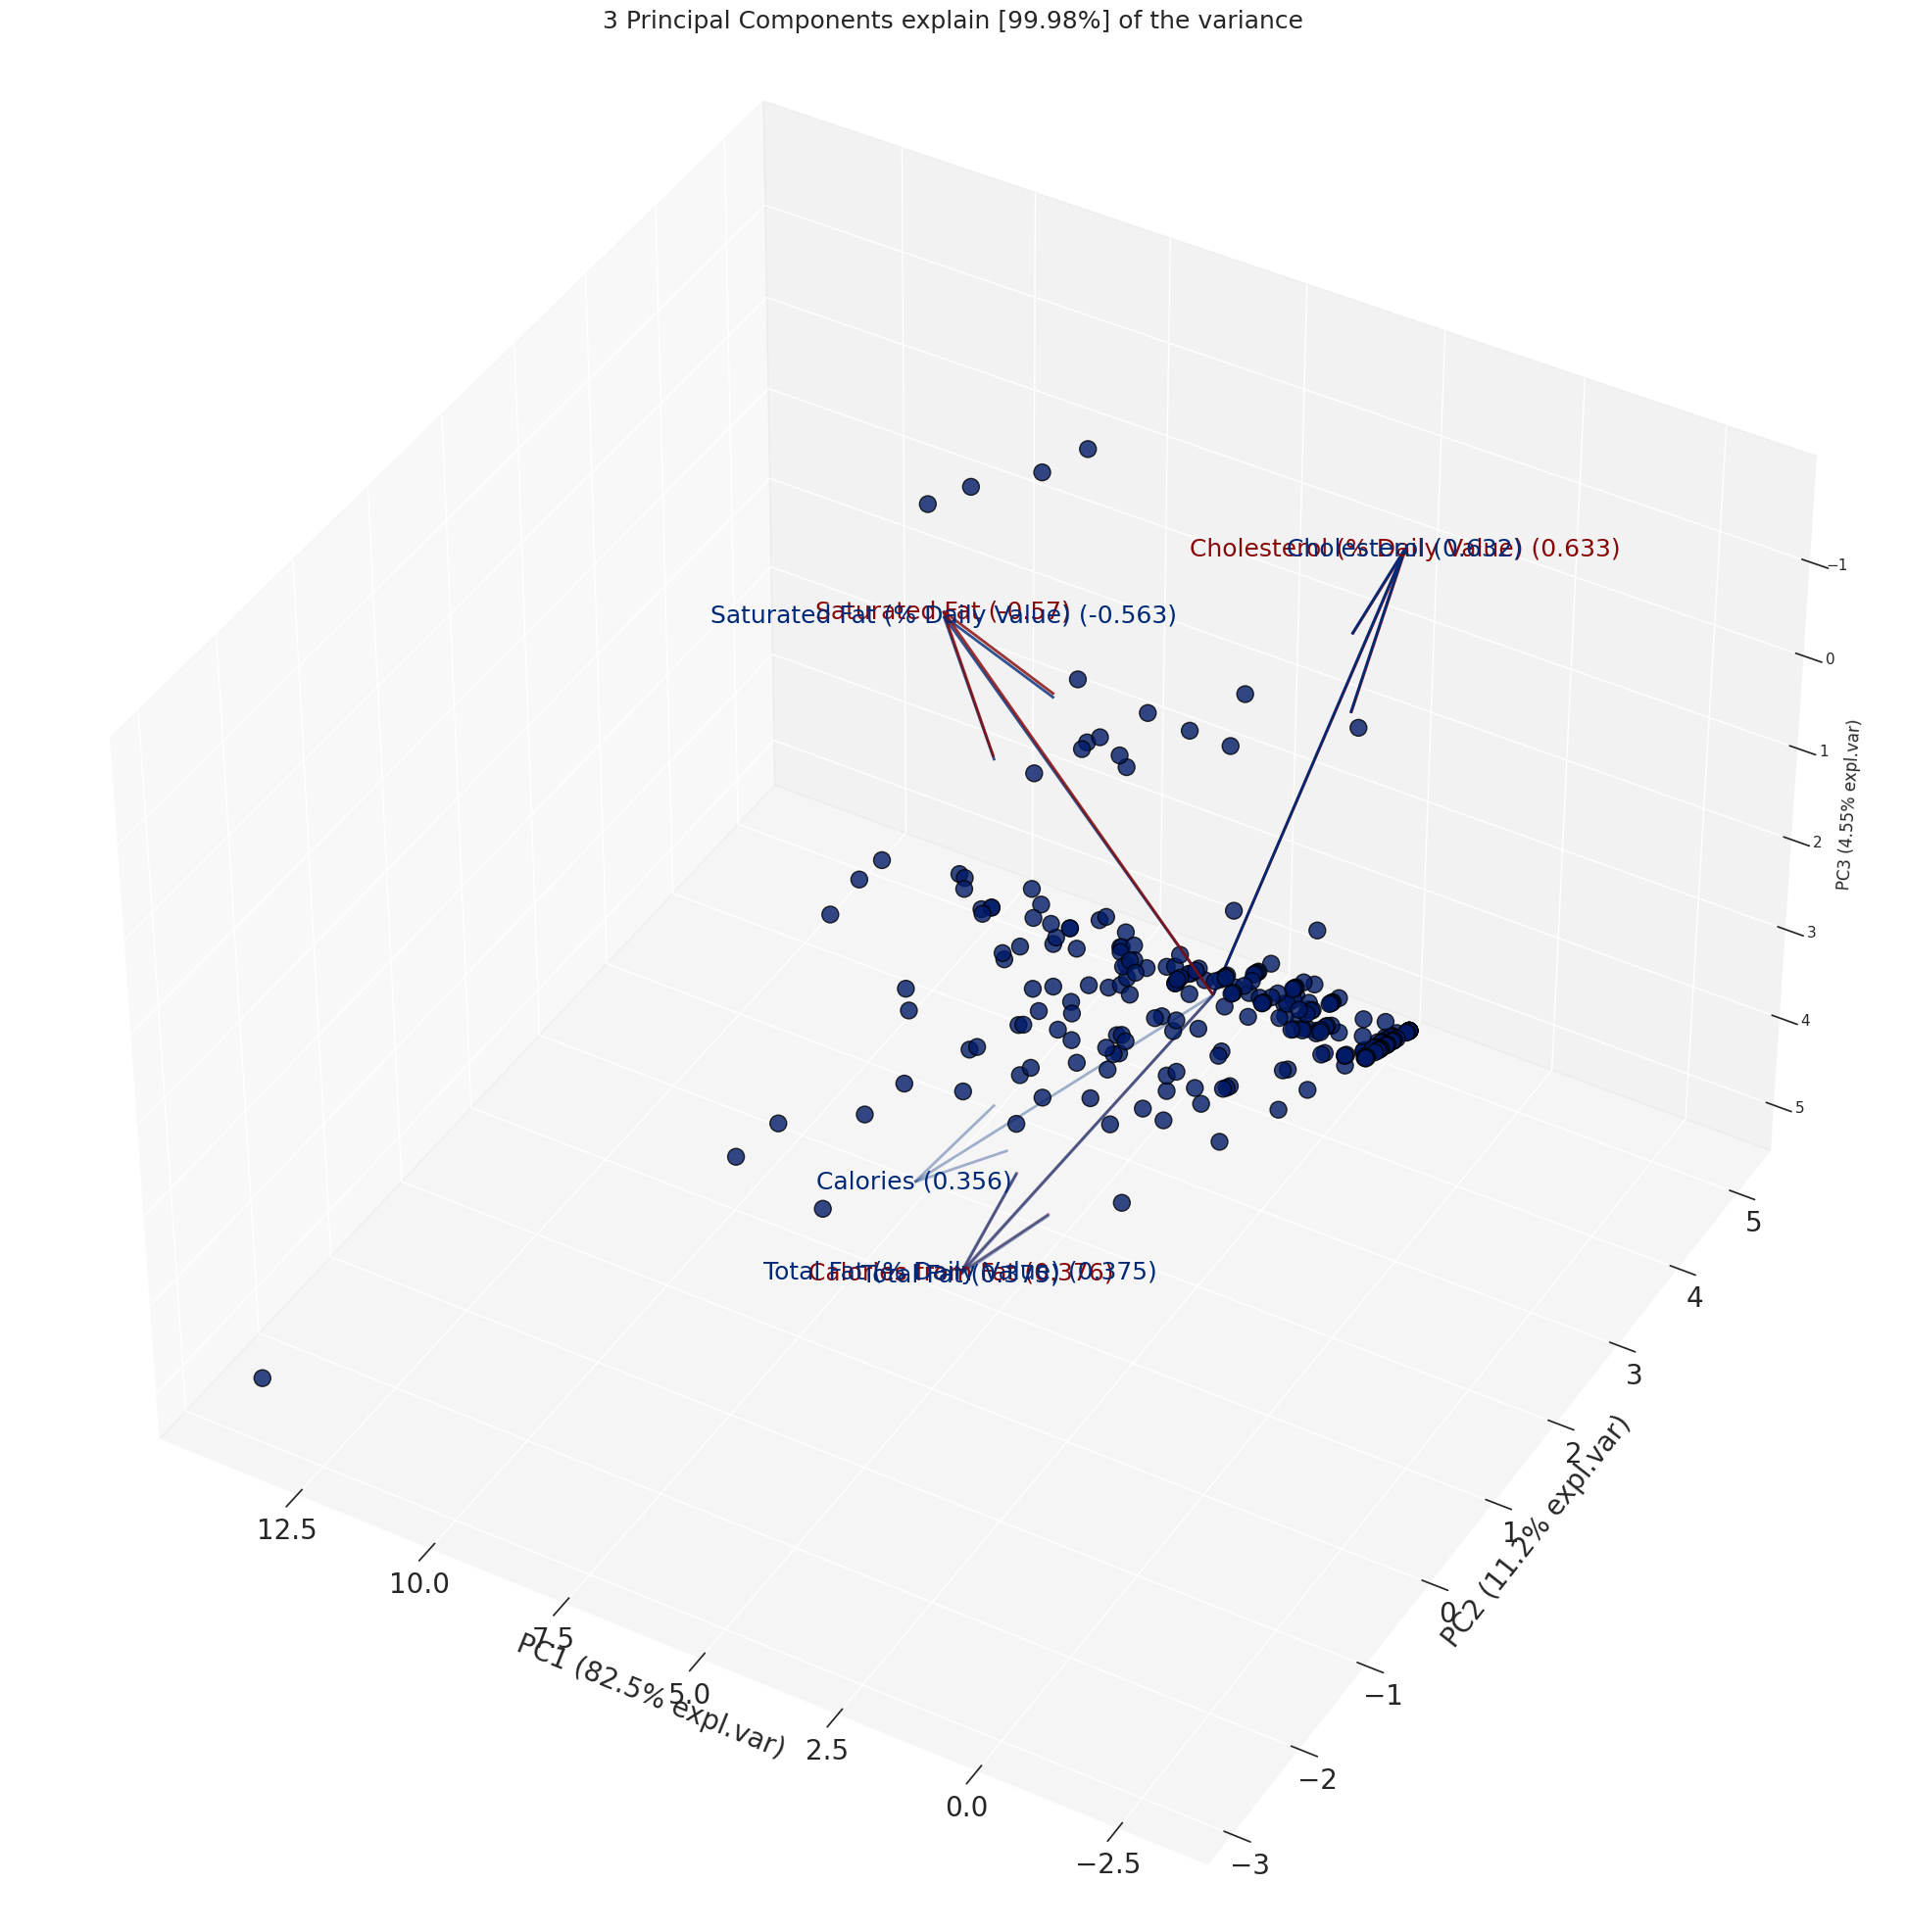

In [29]:
ax = model.biplot3d(legend=False)

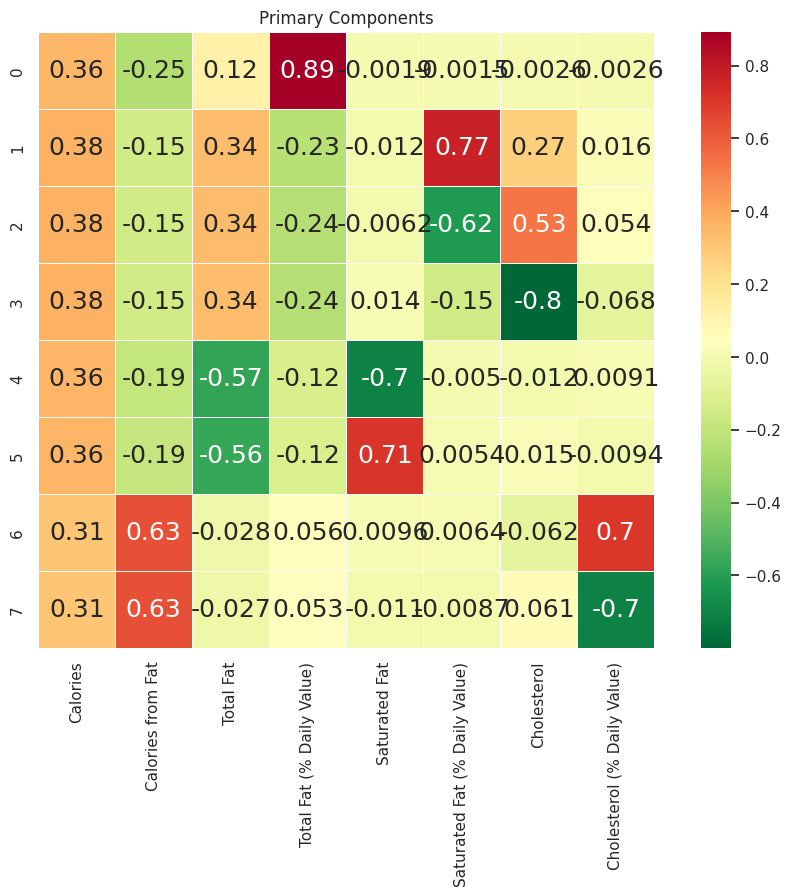

PC1:[0.35613976 0.37556104 0.37536944 0.37546715 0.35793184 0.35870938
 0.31113614 0.31088142]
PC2:[-0.24674505 -0.14816951 -0.15025781 -0.14993603 -0.1918437  -0.19035187
  0.63159826  0.6325743 ]
[[ 0.35613976 -0.24674505  0.1226196   0.89287528 -0.00186819 -0.00153027
  -0.00259668 -0.00263514]
 [ 0.37556104 -0.14816951  0.33712324 -0.23492047 -0.01203652  0.77217792
   0.26739809  0.01595726]
 [ 0.37536944 -0.15025781  0.33827995 -0.23706702 -0.00622339 -0.61656994
   0.53177041  0.05393789]
 [ 0.37546715 -0.14993603  0.33607559 -0.24010662  0.01375832 -0.15299929
  -0.79858324 -0.0679143 ]
 [ 0.35793184 -0.1918437  -0.57049298 -0.11892588 -0.70372112 -0.00502501
  -0.01196069  0.00913603]
 [ 0.35870938 -0.19035187 -0.56295723 -0.11686019  0.71005944  0.00544307
   0.01460684 -0.00944466]
 [ 0.31113614  0.63159826 -0.02823346  0.05624617  0.00960875  0.00638963
  -0.0620639   0.70450841]
 [ 0.31088142  0.6325743  -0.02742292  0.05263885 -0.0111115  -0.00871441
   0.06138582 -0.7040

In [30]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
#ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Primary Components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')
print (A)

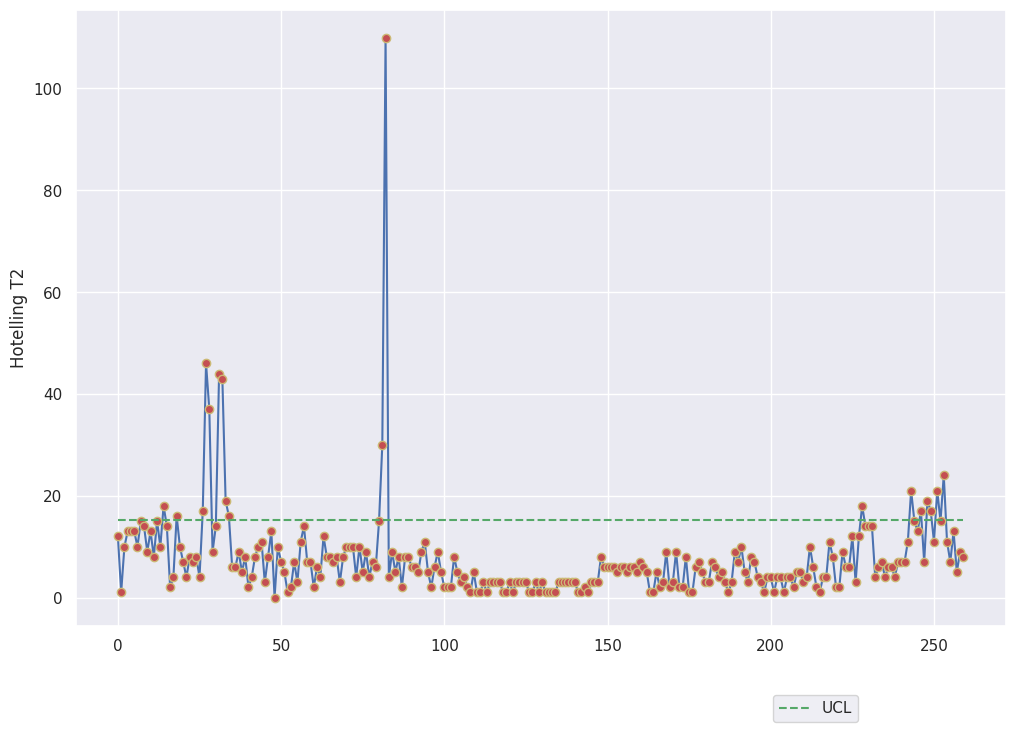

In [31]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling T2')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [32]:
print(np.argwhere(Tsquare>UCL))

[[ 14]
 [ 18]
 [ 26]
 [ 27]
 [ 28]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 81]
 [ 82]
 [228]
 [243]
 [246]
 [248]
 [249]
 [251]
 [253]]


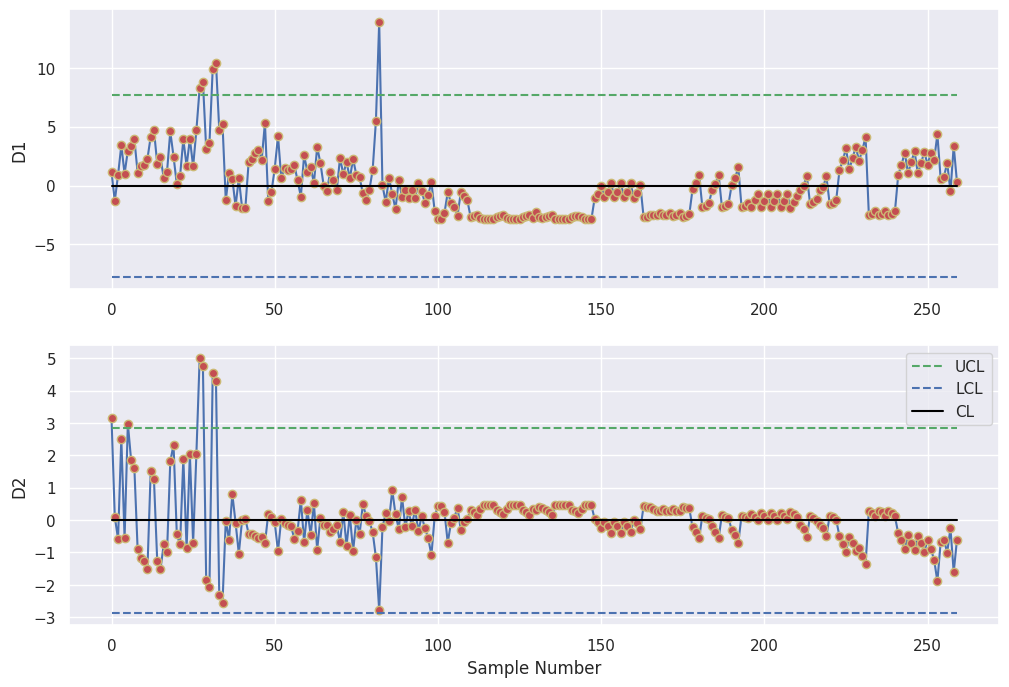

In [33]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('D1')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('D2')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()


In [34]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[27]
 [28]
 [31]
 [32]
 [82]]
[]
[[ 0]
 [ 5]
 [27]
 [28]
 [31]
 [32]]


In [41]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']


Train Dataset Size: 182
Test Dataset Size: 78


DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      1.000     1.000     1.000        63
           2      1.000     1.000     1.000        15

    accuracy                          1.000        78
   macro avg      1.000     1.000     1.000        78
weighted avg      1.000     1.000     1.000        78



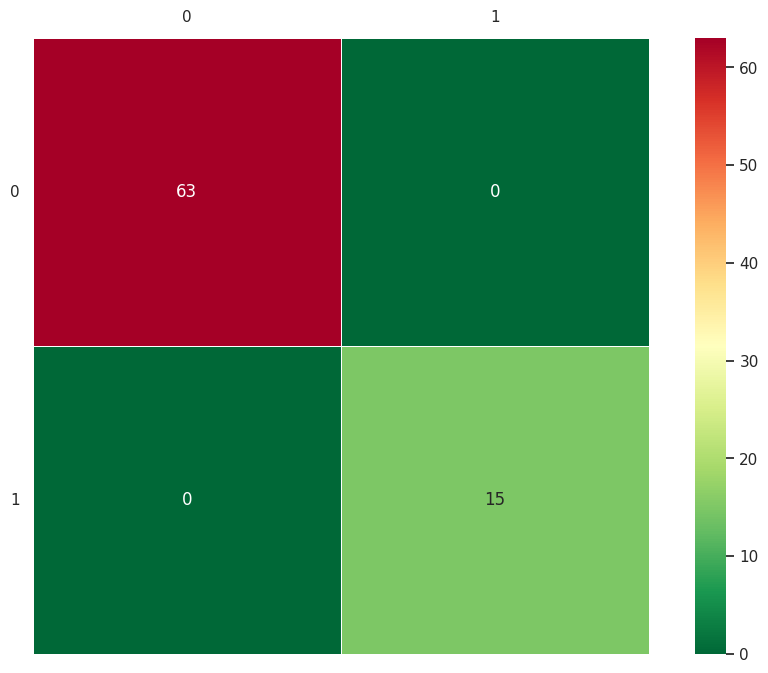

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.908     0.937     0.922        63
           2      0.692     0.600     0.643        15

    accuracy                          0.872        78
   macro avg      0.800     0.768     0.782        78
weighted avg      0.866     0.872     0.868        78



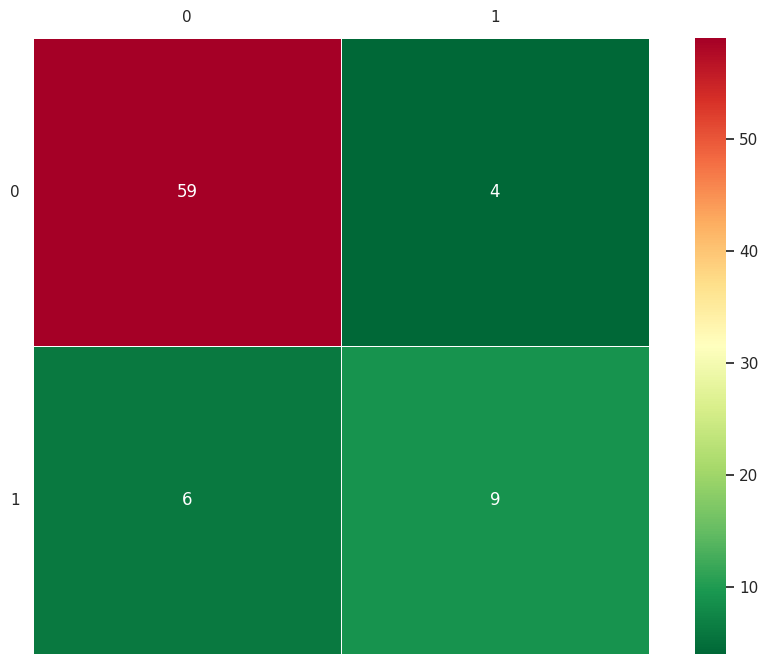

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.896     0.952     0.923        63
           2      0.727     0.533     0.615        15

    accuracy                          0.872        78
   macro avg      0.811     0.743     0.769        78
weighted avg      0.863     0.872     0.864        78



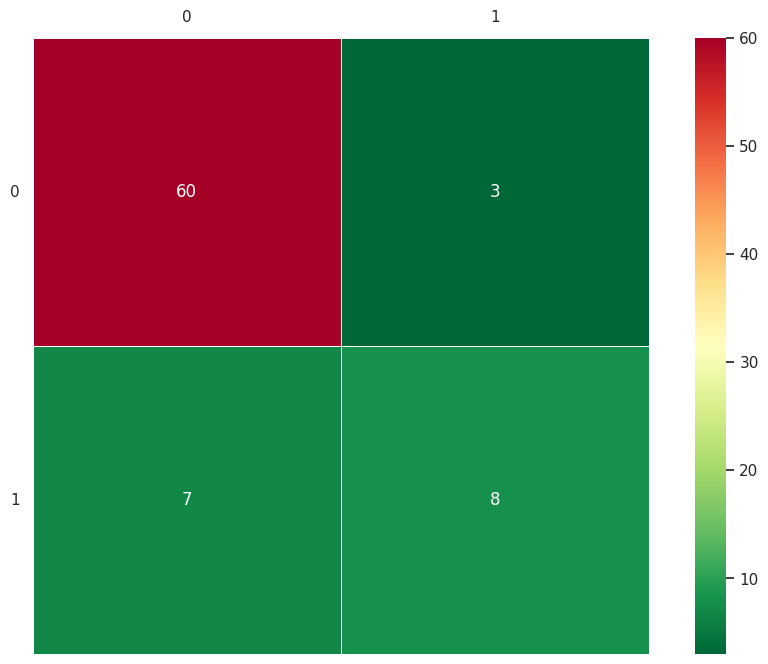

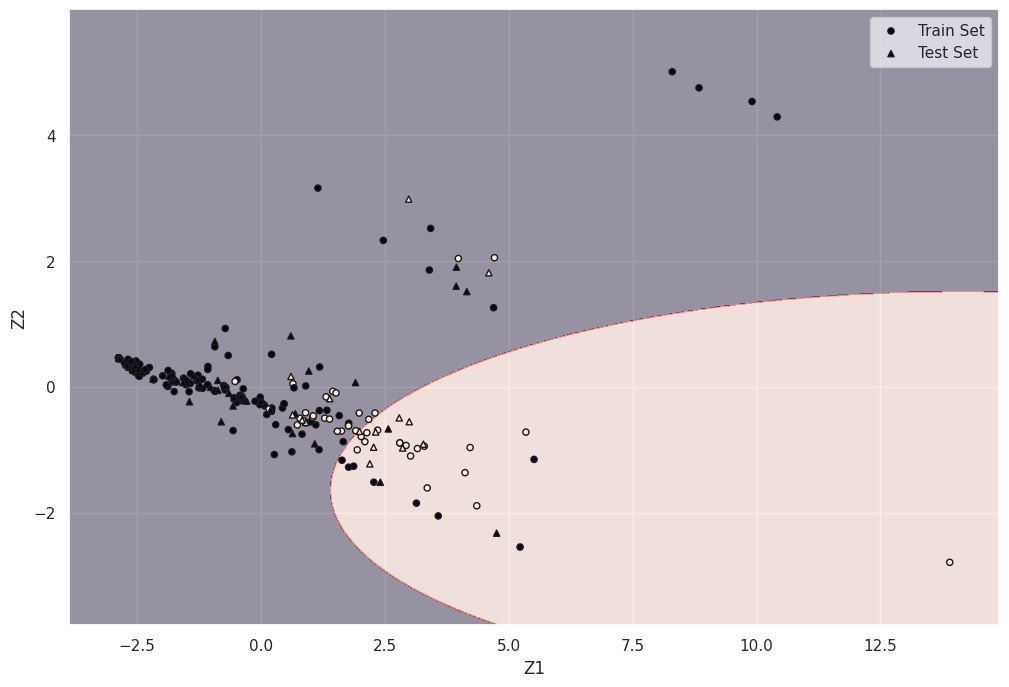

(array([11, 22, 28, 40, 42, 61, 63, 65, 69, 70]),)


In [42]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

Grid Search Results:
k_full_data: {'n_neighbors': 2}
k_Z: {'n_neighbors': 2}
k_Z12: {'n_neighbors': 2}
                                    0         1         2         3         4
knn_full_data fit_time       0.004335  0.009805  0.003186  0.004624  0.004195
knn_Z  fit_time              0.001357  0.001294  0.001667  0.007989  0.002117
knn_Z12 fit_time             0.009377  0.001535  0.006780  0.001552  0.001517
knn_full_data test_f1_macro  0.790960  0.701613  0.911330  0.800000  0.839286
knn_Z  test_f1_macro         0.860025  0.874576  0.911330  0.731744  0.961497
knn_Z12 test_f1_macro        0.681340  0.823810  0.765319  0.800000  0.873684

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      0.899     0.984     0.939        63
           2      0.889     0.533     0.667        15

    accuracy                          0.897        78
   macro avg      0.894     0.759     0.803        78
weighted avg      0.897     0.897   

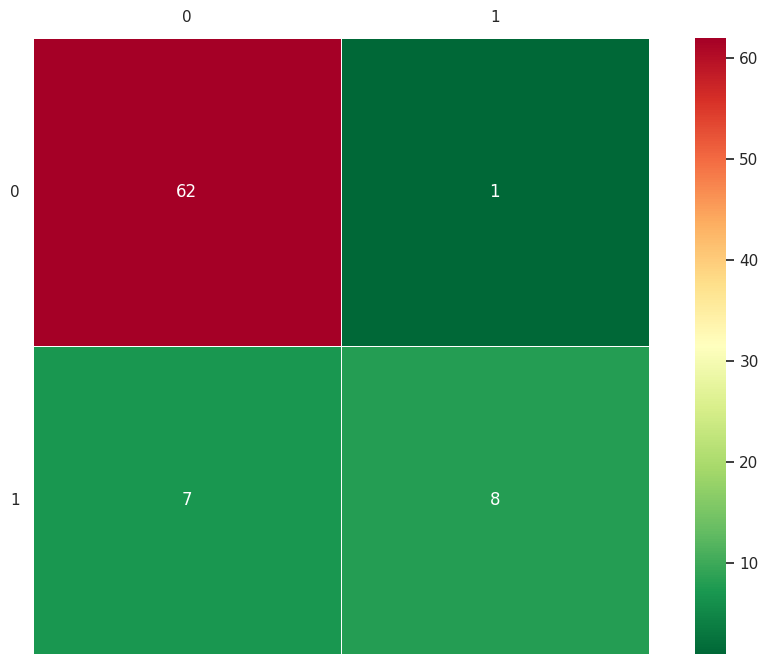

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.953     0.968     0.961        63
           2      0.857     0.800     0.828        15

    accuracy                          0.936        78
   macro avg      0.905     0.884     0.894        78
weighted avg      0.935     0.936     0.935        78



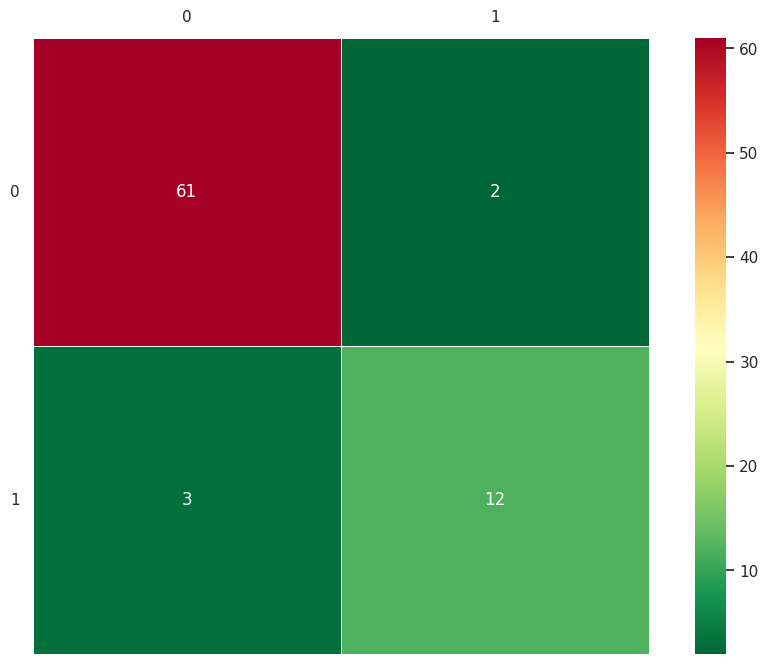

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.923     0.952     0.938        63
           2      0.769     0.667     0.714        15

    accuracy                          0.897        78
   macro avg      0.846     0.810     0.826        78
weighted avg      0.893     0.897     0.895        78



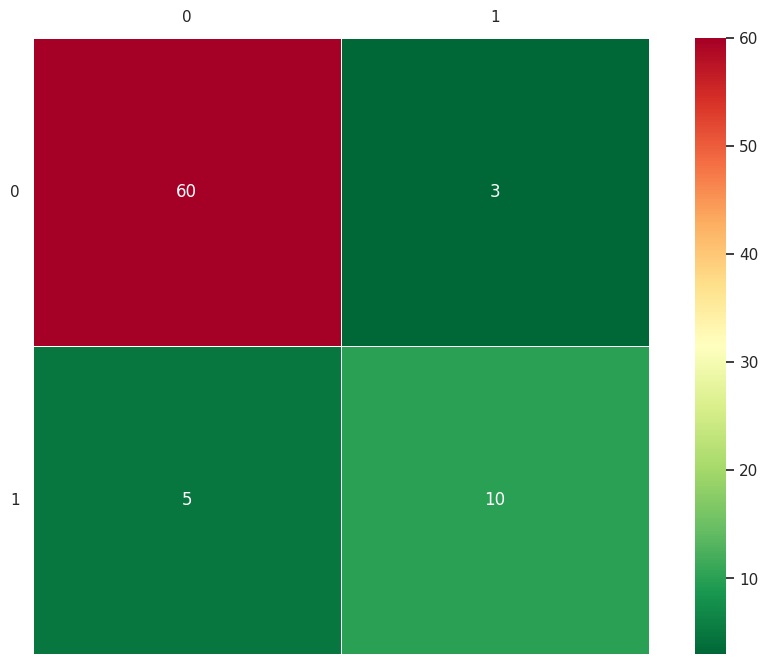

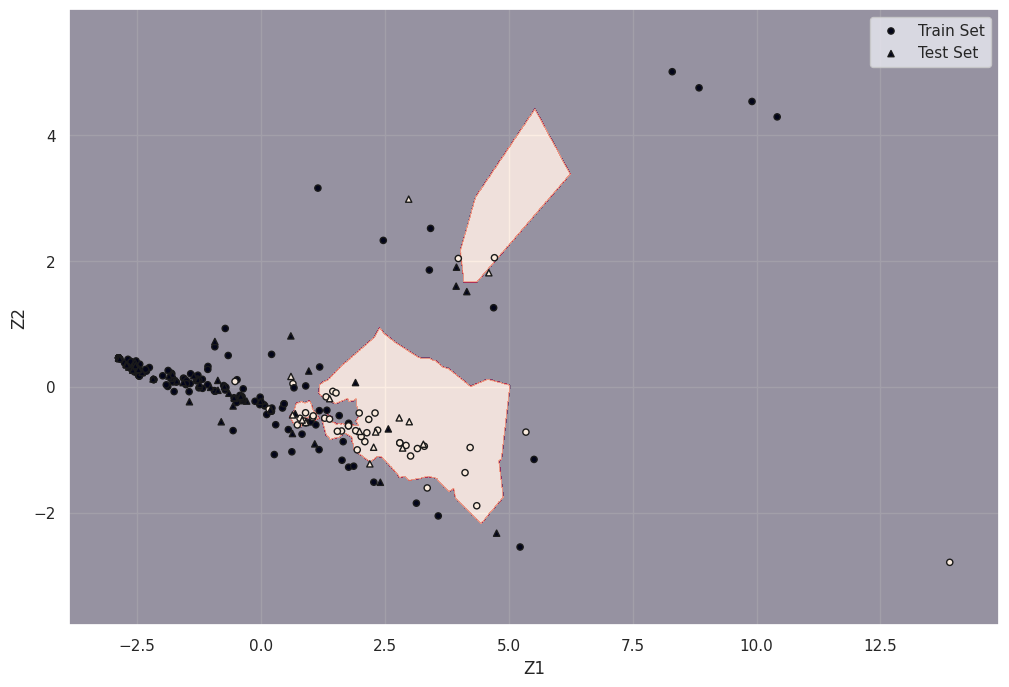

In [43]:
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()


Grid Search Results:
depth_full_data: {'max_depth': 16}
depth_Z: {'max_depth': 16}
depth_Z12: {'max_depth': 16}
                                   0         1         2         3         4
dt_full_data fit_time       0.003309  0.002854  0.006138  0.003068  0.002763
dt_Z  fit_time              0.001964  0.001524  0.001811  0.001515  0.001414
dt_Z12 fit_time             0.001915  0.002460  0.001679  0.001295  0.001192
dt_full_data test_f1_macro  1.000000  1.000000  1.000000  1.000000  1.000000
dt_Z  test_f1_macro         0.540113  0.840517  0.831933  0.873684  0.776398
dt_Z12 test_f1_macro        0.579979  0.823810  0.697479  0.873684  0.892751

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      1.000     1.000     1.000        63
           2      1.000     1.000     1.000        15

    accuracy                          1.000        78
   macro avg      1.000     1.000     1.000        78
weighted avg      1.000     1.000 

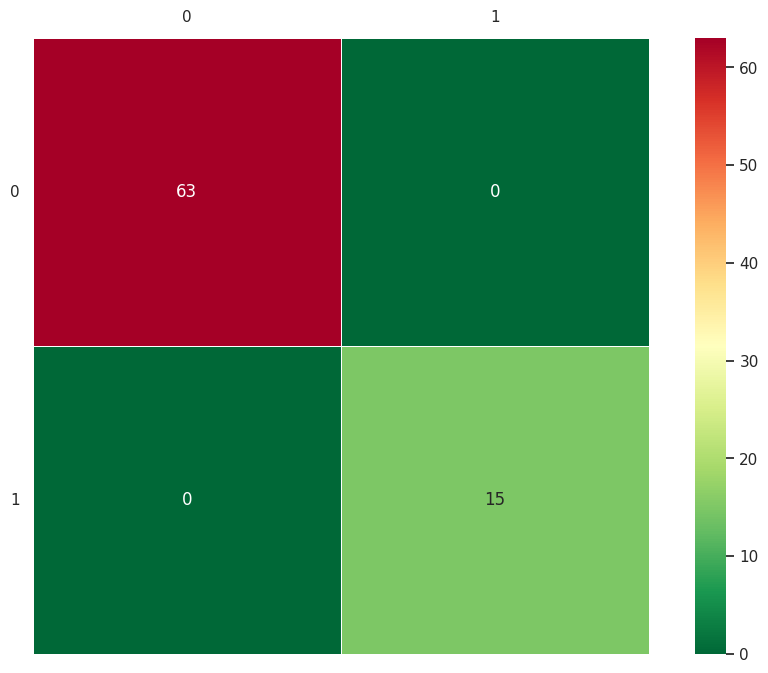

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.933     0.889     0.911        63
           2      0.611     0.733     0.667        15

    accuracy                          0.859        78
   macro avg      0.772     0.811     0.789        78
weighted avg      0.871     0.859     0.864        78



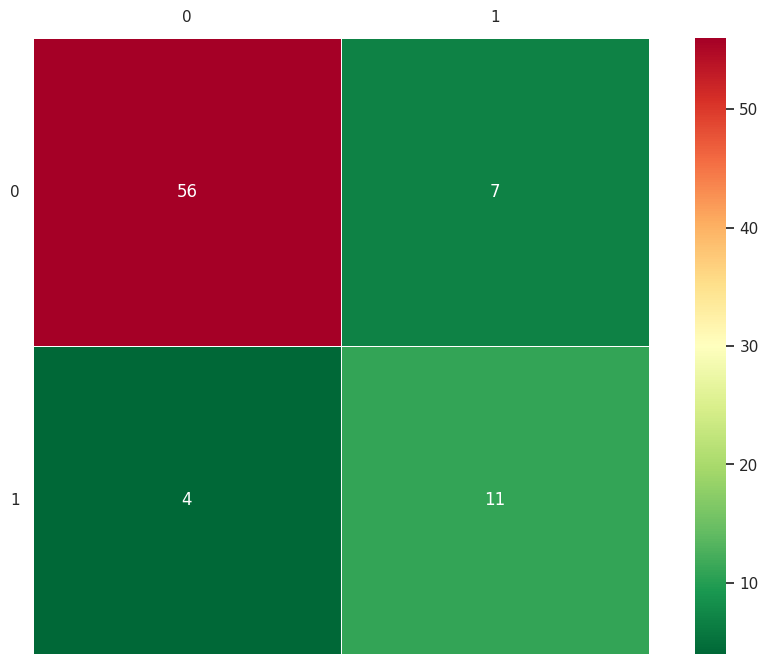

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.937     0.937     0.937        63
           2      0.733     0.733     0.733        15

    accuracy                          0.897        78
   macro avg      0.835     0.835     0.835        78
weighted avg      0.897     0.897     0.897        78



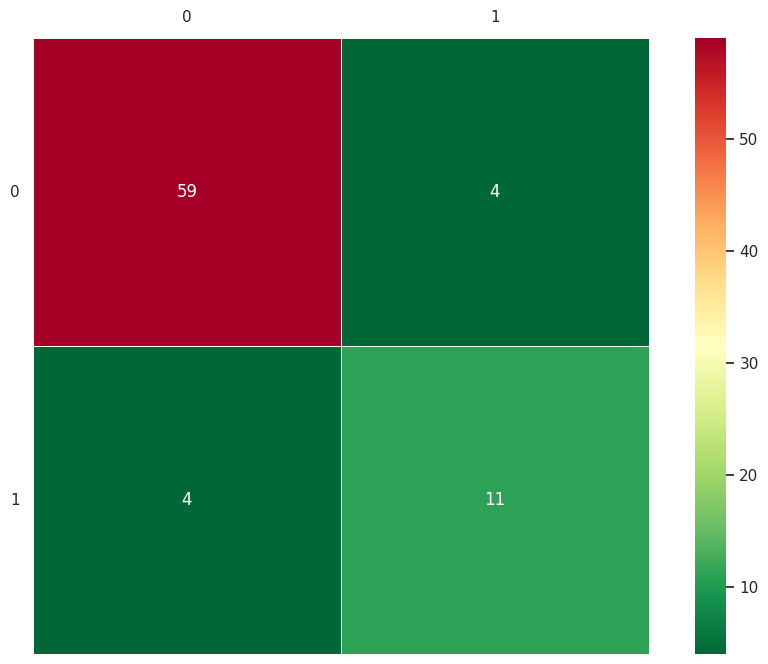

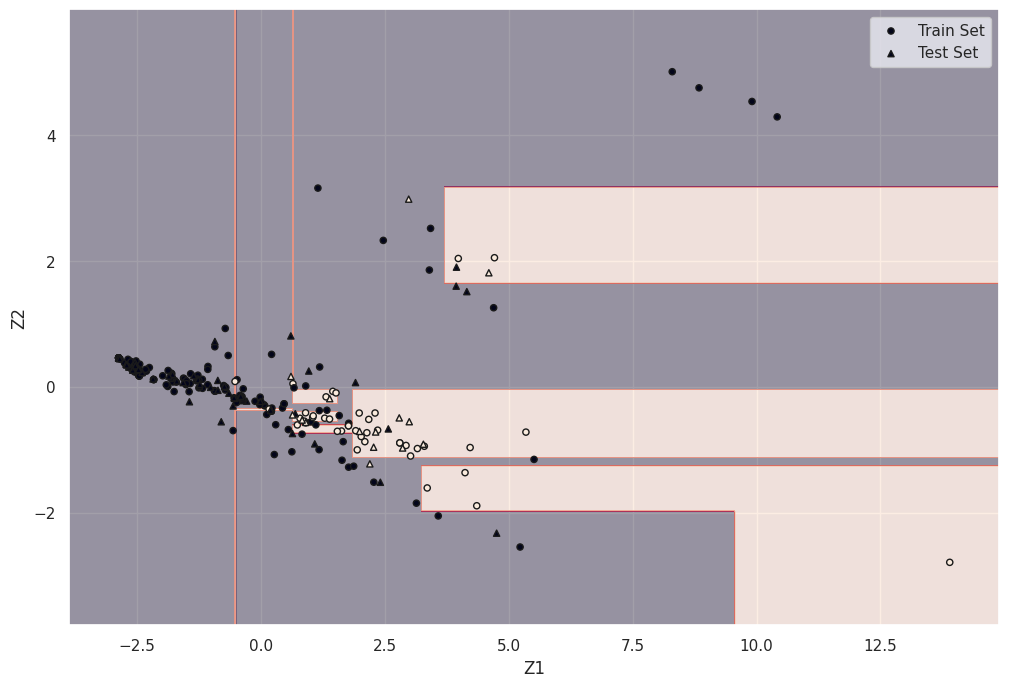

In [44]:
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('Z1')
    plt.ylabel('Z2')
    plt.legend()
    plt.show()

DATASET: FULL DATA


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


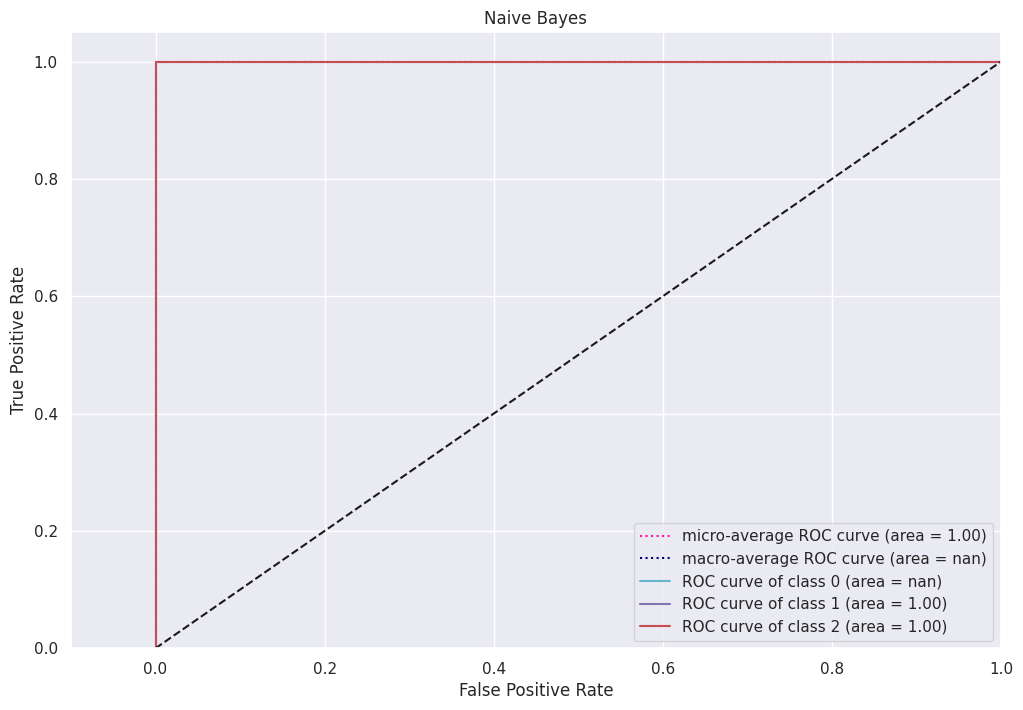

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


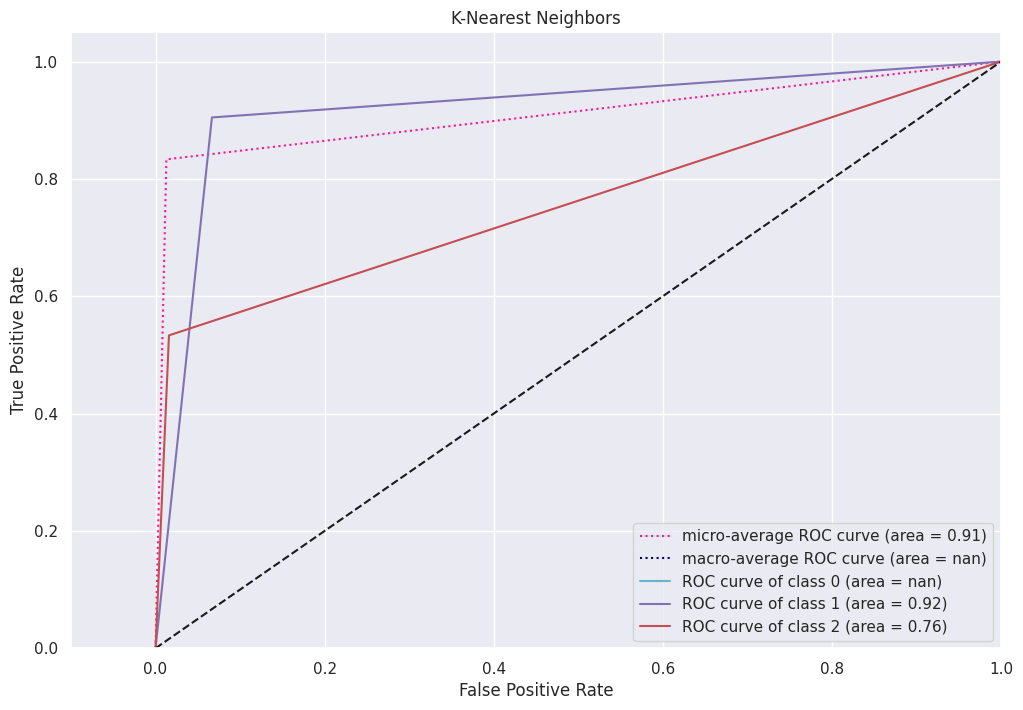

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


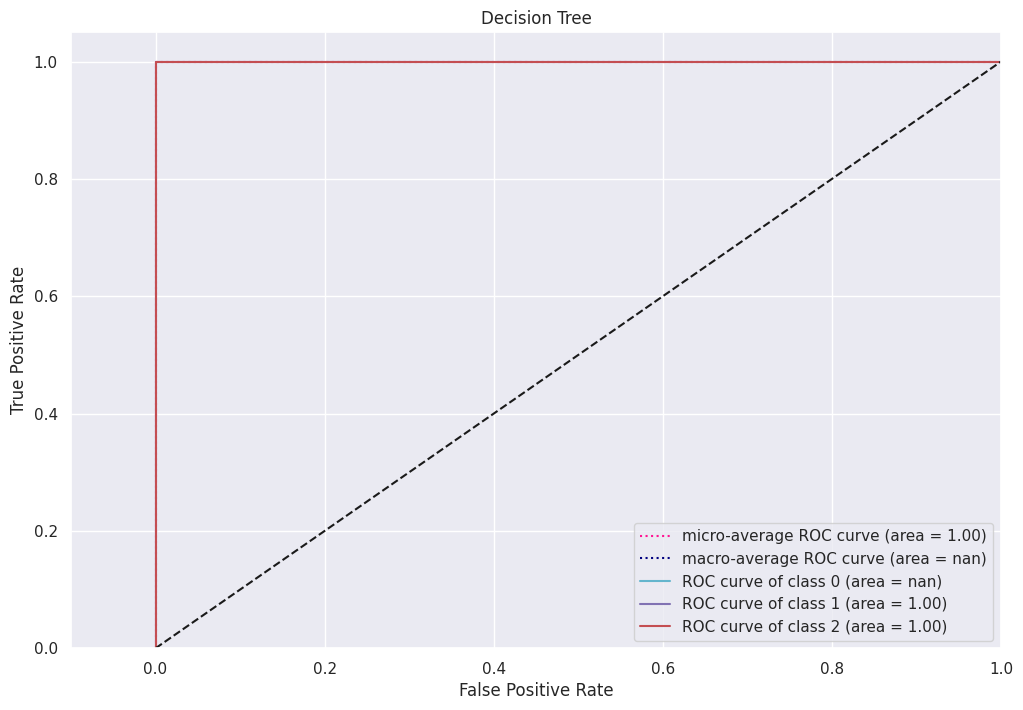

DATASET: Z


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


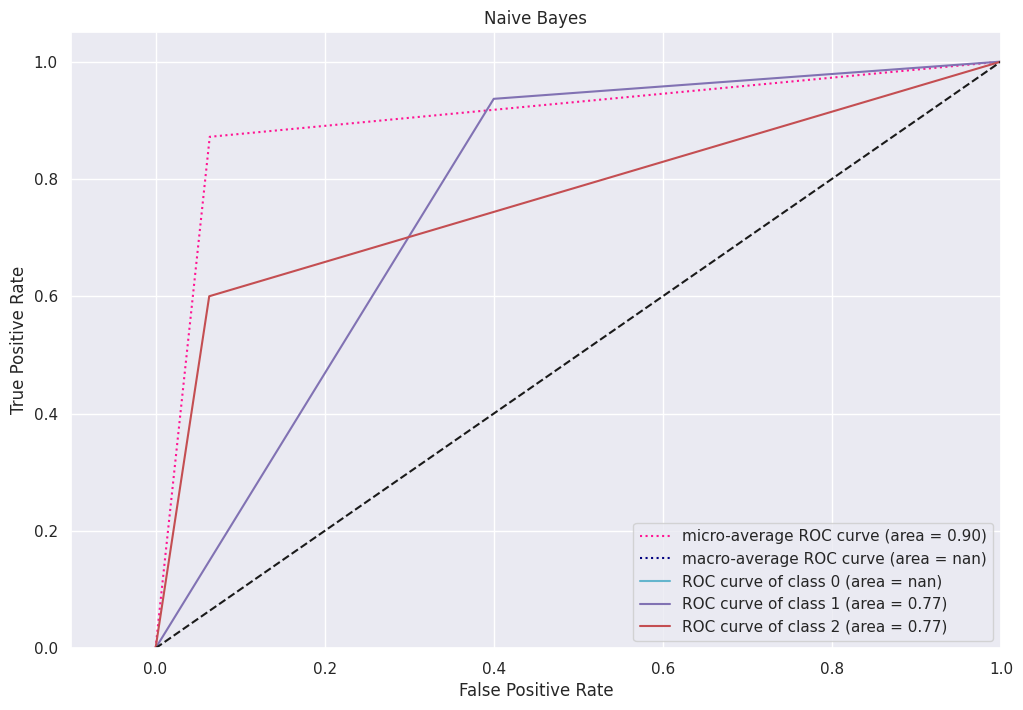

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


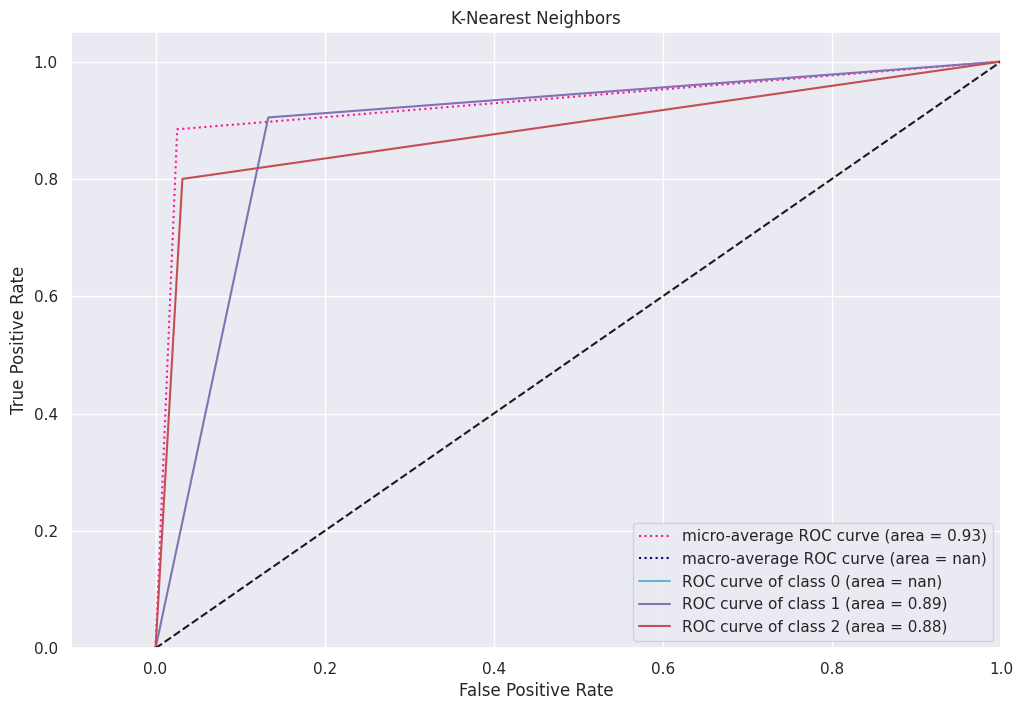

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


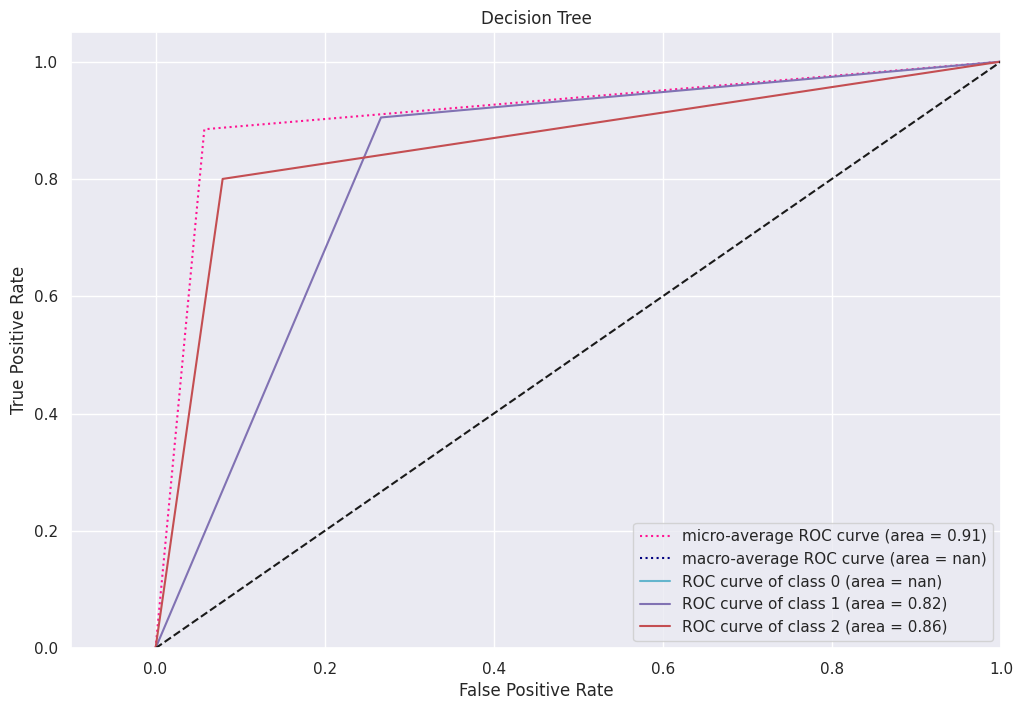

DATASET: Z12


/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


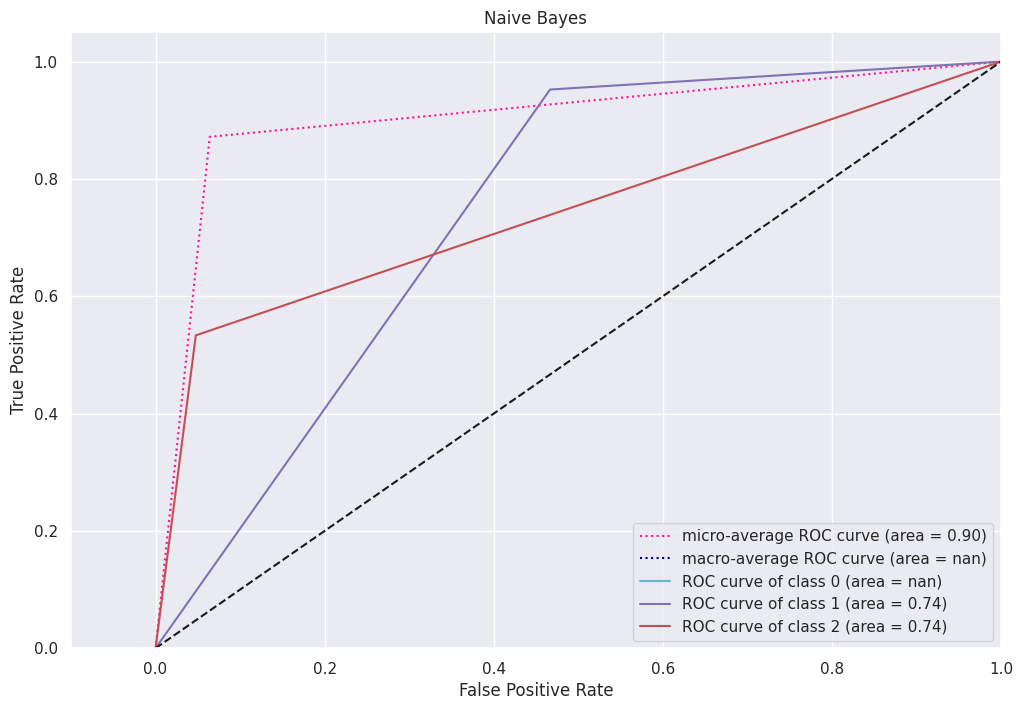

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


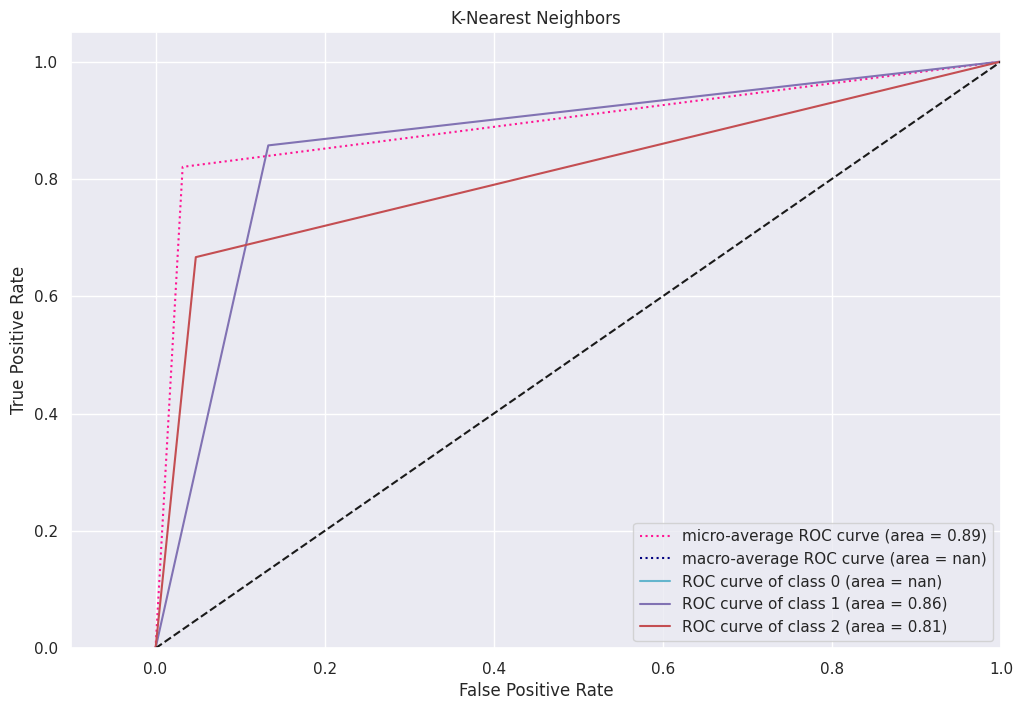

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


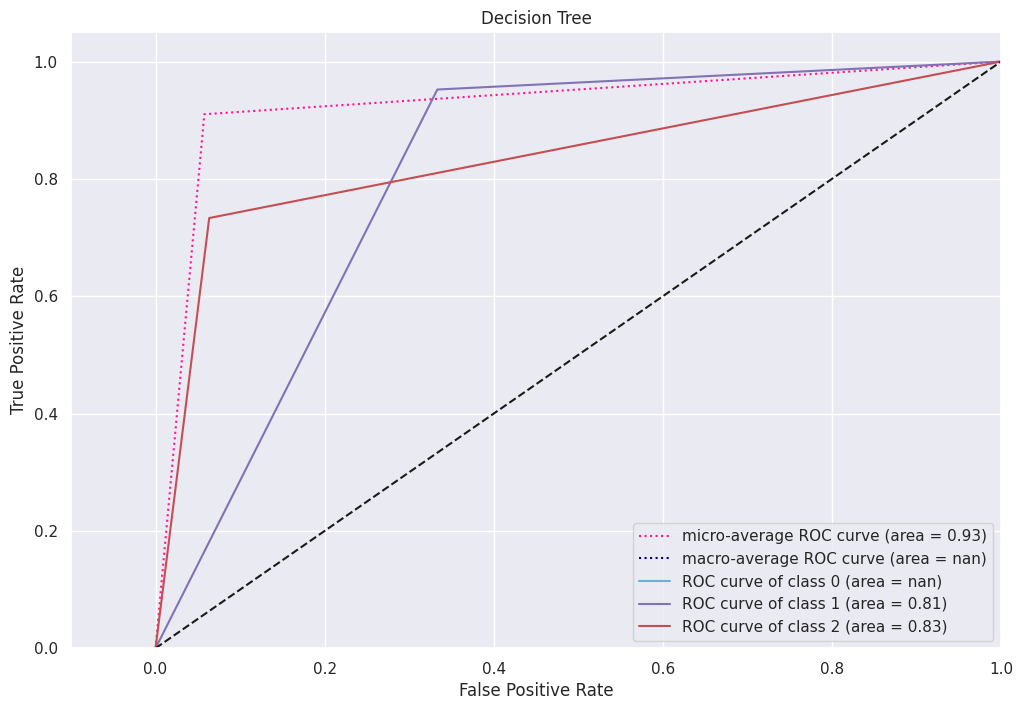

In [45]:
datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

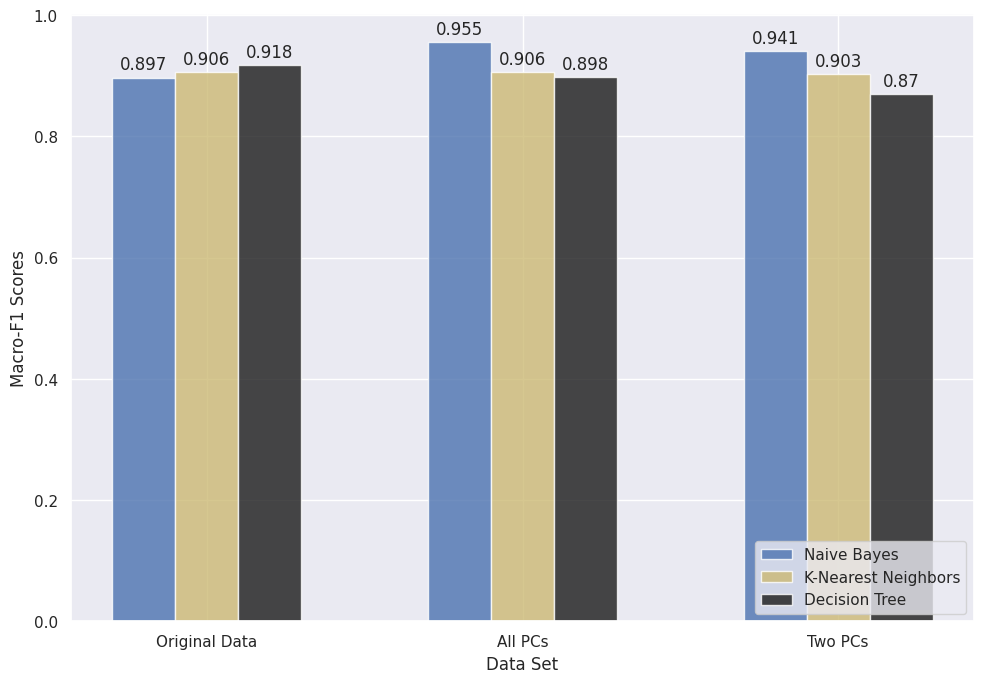

In [46]:
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()